# Visualize results

## Imports

In [1]:
% reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# compute
import numpy as np
import pandas as pd

# data io
import glob
import deepdish as dd
import sys
sys.path.append('../')

# image
import cv2

# plot
import matplotlib.pyplot as plt
%matplotlib inline

# spykes
from spykes.neuropop import NeuroPop
from spykes.neurovis import NeuroVis

# stats
from scipy.stats import circmean

# machine learning
import xgboost as xgb

# local
import V4pyutils as V4

/opt/anaconda/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release.  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 3: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5103)


## Load precomputed files and results

In [3]:
df_neurons = pd.read_pickle('../02-preprocessed_data/data_to_combine_across_sessions')
df_neurons.head()

name  art_sessions  \
0  spikes.0101        [2, 3]   
1  spikes.0301        [8, 9]   
2  spikes.0500     [3, 4, 5]   
3  spikes.0500     [4, 5, 6]   
4  spikes.0600  [2, 3, 4, 5]   

                                       art_filenames nat_sessions  \
0  [Ro150127_s84a_huecircle_0003, Ro150128_s85a_h...          [4]   
1  [Ro150211_s88a_huecircle_0003, Ro150212_289a_h...     [11, 12]   
2  [Ro150128_s85a_huecircle_0003, Ro150129_s86a_h...       [5, 6]   
3  [Ro150129_s86a_huecircle_0003, Ro150129_s86a_h...    [6, 7, 8]   
4  [Ro150127_s84a_huecircle_0003, Ro150128_s85a_h...    [4, 5, 6]   

                                       nat_filenames  
0                   [Ro150129_s86a_FreeViewPic_0001]  
1  [Ro150216_s91a_FreeViewPic_0004, Ro150216_s91a...  
2  [Ro150129_s86a_FreeViewPic_0005, Ro150210_s87a...  
3  [Ro150210_s87a_FreeViewPic_manyimage_0004, Ro1...  
4  [Ro150129_s86a_FreeViewPic_0001, Ro150129_s86a...

In [4]:
nat_df = pd.read_pickle('../02-preprocessed_data/merged_nat_data_across_sessions')
nat_df.head()

predictors.col  predictors.col_drift  predictors.drift  \
0           825.0                  -7.0              16.0   
1           565.0                 -11.0              16.0   
2           510.0                  -7.0              15.0   
3           696.0                   3.0               9.0   
4           848.0                   3.0               6.0   

   predictors.fix_duration  predictors.fix_offset  predictors.fix_offset_col  \
0                    0.127                  1.337                      825.0   
1                    0.145                  1.531                      564.0   
2                    0.109                  1.678                      508.0   
3                    0.126                  1.855                      696.0   
4                    0.190                  2.092                      850.0   

   predictors.fix_offset_row  predictors.fix_onset  predictors.fix_onset_col  \
0                      397.0                 1.210                     832.0   
1                      402.0                 1.386                     575.0   
2                      350.0                 1.569                     515.0   
3                      611.0                 1.729                     693.0   
4                      634.0                 1.902                     847.0   

   predictors.fix_onset_row       ...        spikes.9002 spikes.9100  \
0                     406.0       ...                NaN         1.0   
1                     407.0       ...                NaN         2.0   
2                     358.0       ...                NaN         2.0   
3                     605.0       ...                NaN         3.0   
4                     637.0       ...                NaN         0.0   

   spikes.9102  spikes.9200  spikes.9202 spikes.9300  spikes.9400  \
0          NaN          1.0          NaN         NaN          NaN   
1          NaN          2.0          NaN         NaN          NaN   
2          NaN          2.0          NaN         NaN          NaN   
3          NaN          3.0          NaN         NaN          NaN   
4          NaN          0.0          NaN         NaN          NaN   

   spikes.9600                                       session.name  \
0          5.0  ../V4pydata/H5data/M3/Ro150125_s83a_FreeViewPi...   
1          2.0  ../V4pydata/H5data/M3/Ro150125_s83a_FreeViewPi...   
2          1.0  ../V4pydata/H5data/M3/Ro150125_s83a_FreeViewPi...   
3          1.0  ../V4pydata/H5data/M3/Ro150125_s83a_FreeViewPi...   
4          2.0  ../V4pydata/H5data/M3/Ro150125_s83a_FreeViewPi...   

   session.number  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 136 columns]

In [5]:
nat_features = pd.read_pickle('../02-preprocessed_data/precomputed_nat_features')
nat_features.head()

accepted_indices                                     image_features  \
0                 1  hue.histogram    [0.0001, 0.0001, 0.0002, 0.00...   
1                 2  hue.histogram    [0.0, 0.0, 0.0001, 0.0, 0.000...   
2                 5  hue.histogram    [0.0001, 0.0001, 0.0005, 0.00...   
3                10  hue.histogram    [0.0001, 0.0, 0.0003, 0.0003,...   
4                12  hue.histogram    [0.0148, 0.01, 0.0247, 0.0683...   

                                  non_image_features  
0  predictors.col                    565
predicto...  
1  predictors.col                    510
predicto...  
2  predictors.col                    366
predicto...  
3  predictors.col                    509
predicto...  
4  predictors.col                    308
predicto...

In [6]:
df_fits_all = pd.read_pickle('../02-preprocessed_data/fits_all')
df_fits_all.head(15)
#len(df_fits_all)

name        art_sessions  \
0   spikes.0101              [2, 3]   
1   spikes.0301              [8, 9]   
2   spikes.0500           [3, 4, 5]   
3   spikes.0500           [4, 5, 6]   
4   spikes.0600        [2, 3, 4, 5]   
5   spikes.0700        [0, 1, 2, 3]   
6   spikes.0700              [4, 5]   
7   spikes.0700              [7, 8]   
8   spikes.0900  [0, 1, 2, 3, 4, 5]   
9   spikes.0900     [3, 4, 5, 6, 7]   
10  spikes.0900           [7, 8, 9]   
11  spikes.1100              [2, 3]   
12  spikes.1400              [4, 5]   
13  spikes.1400              [6, 7]   
14  spikes.1400           [7, 8, 9]   

                                        art_filenames     nat_sessions  \
0   [Ro150127_s84a_huecircle_0003, Ro150128_s85a_h...              [4]   
1   [Ro150211_s88a_huecircle_0003, Ro150212_289a_h...         [11, 12]   
2   [Ro150128_s85a_huecircle_0003, Ro150129_s86a_h...           [5, 6]   
3   [Ro150129_s86a_huecircle_0003, Ro150129_s86a_h...        [6, 7, 8]   
4   [Ro150127_s84a_huecircle_0003, Ro150128_s85a_h...        [4, 5, 6]   
5   [Ro150126_s83a_huecircle_0003, Ro150126_s83a_h...        [2, 3, 4]   
6   [Ro150129_s86a_huecircle_0003, Ro150129_s86a_h...              [6]   
7   [Ro150211_s88a_huecircle_0003, Ro150211_s88a_h...             [10]   
8   [Ro150126_s83a_huecircle_0003, Ro150126_s83a_h...  [2, 3, 4, 5, 6]   
9   [Ro150128_s85a_huecircle_0003, Ro150129_s86a_h...  [5, 6, 7, 8, 9]   
10  [Ro150211_s88a_huecircle_0003, Ro150211_s88a_h...     [10, 11, 12]   
11  [Ro150127_s84a_huecircle_0003, Ro150128_s85a_h...              [4]   
12  [Ro150129_s86a_huecircle_0003, Ro150129_s86a_h...              [6]   
13  [Ro150210_s87a_huecircle_0003, Ro150211_s88a_h...              [9]   
14  [Ro150211_s88a_huecircle_0003, Ro150211_s88a_h...     [10, 11, 12]   

                                        nat_filenames  \
0                    [Ro150129_s86a_FreeViewPic_0001]   
1   [Ro150216_s91a_FreeViewPic_0004, Ro150216_s91a...   
2   [Ro150129_s86a_FreeViewPic_0005, Ro150210_s87a...   
3   [Ro150210_s87a_FreeViewPic_manyimage_0004, Ro1...   
4   [Ro150129_s86a_FreeViewPic_0001, Ro150129_s86a...   
5   [Ro150127_s84a_FreeViewPic_0001, Ro150128_s85a...   
6          [Ro150210_s87a_FreeViewPic_manyimage_0004]   
7                    [Ro150213_s90a_FreeViewPic_0004]   
8   [Ro150127_s84a_FreeViewPic_0001, Ro150128_s85a...   
9   [Ro150129_s86a_FreeViewPic_0005, Ro150210_s87a...   
10  [Ro150213_s90a_FreeViewPic_0004, Ro150216_s91a...   
11                   [Ro150129_s86a_FreeViewPic_0001]   
12         [Ro150210_s87a_FreeViewPic_manyimage_0004]   
13        [Ro150212_289a_FreeViewPic_manyimages_0004]   
14  [Ro150213_s90a_FreeViewPic_0004, Ro150216_s91a...   

                                            art_model  \
0   {u'pseudo_R2': [0.203104405728, 0.075755813703...   
1   {u'pseudo_R2': [0.687377793089, 0.101933213735...   
2   {u'pseudo_R2': [-0.436355444104, -0.2849994289...   
3   {u'pseudo_R2': [-0.122742425057, 0.20941441713...   
4   {u'pseudo_R2': [-0.242452582303, -0.1639748774...   
5   {u'pseudo_R2': [0.31442951267, 0.379128757243,...   
6   {u'pseudo_R2': [0.0983122264378, 0.00635340519...   
7   {u'pseudo_R2': [0.0431744975479, 0.16398145871...   
8   {u'pseudo_R2': [0.359327553671, 0.29566236479,...   
9   {u'pseudo_R2': [0.137906719267, -0.78330654719...   
10  {u'pseudo_R2': [-0.108667176106, 0.32865544643...   
11  {u'pseudo_R2': [0.0849455141901, 0.03400358386...   
12  {u'pseudo_R2': [0.00961962842399, 0.0481842886...   
13  {u'pseudo_R2': [0.0137995801078, 0.01581591215...   
14  {u'pseudo_R2': [0.0580979346671, 0.07752782892...   

                                      histogram_model  \
0   {u'hue': [1.49274933338, 1.27337944508, 1.5420...   
1   {u'hue': [-2.35624170303, -1.21477484703, -1.6...   
2   {u'hue': [-0.89925122261, -0.840216875076, -0....   
3   {u'hue': [2.06351828575, 2.44149160385, 2.5039...   
4   {u'hue': [1.49274933338, 1.27337944508, 1.5420...   
5   {u'hue': [-2.47962188721, -1.

In [7]:
df_results_all = pd.read_pickle('../02-preprocessed_data/results_all')
df_results_all.head()

name  art_sessions  \
0  spikes.0101        [2, 3]   
1  spikes.0301        [8, 9]   
2  spikes.0500     [3, 4, 5]   
3  spikes.0500     [4, 5, 6]   
4  spikes.0600  [2, 3, 4, 5]   

                                       art_filenames nat_sessions  \
0  [Ro150127_s84a_huecircle_0003, Ro150128_s85a_h...          [4]   
1  [Ro150211_s88a_huecircle_0003, Ro150212_289a_h...     [11, 12]   
2  [Ro150128_s85a_huecircle_0003, Ro150129_s86a_h...       [5, 6]   
3  [Ro150129_s86a_huecircle_0003, Ro150129_s86a_h...    [6, 7, 8]   
4  [Ro150127_s84a_huecircle_0003, Ro150128_s85a_h...    [4, 5, 6]   

                                       nat_filenames  \
0                   [Ro150129_s86a_FreeViewPic_0001]   
1  [Ro150216_s91a_FreeViewPic_0004, Ro150216_s91a...   
2  [Ro150129_s86a_FreeViewPic_0005, Ro150210_s87a...   
3  [Ro150210_s87a_FreeViewPic_manyimage_0004, Ro1...   
4  [Ro150129_s86a_FreeViewPic_0001, Ro150129_s86a...   

                               art_orientation_model  \
0  {u'pseudo_R2': [0.0724950106919, 0.00377718346...   
1  {u'pseudo_R2': [0.0877322467138, 0.07655893314...   
2  {u'pseudo_R2': [-0.164305084384, 0.18516909914...   
3  {u'pseudo_R2': [-0.280337090405, 0.34500779195...   
4  {u'pseudo_R2': [-0.189620184279, -0.6867100036...   

                                         vggl7_model  \
0  {u'joint_model': {u'pseudo_R2': [-0.2141978938...   
1  {u'joint_model': {u'pseudo_R2': [0.86254361178...   
2  {u'joint_model': {u'pseudo_R2': [0.34827657957...   
3  {u'joint_model': {u'pseudo_R2': [0.30792040254...   
4  {u'joint_model': {u'pseudo_R2': [0.69011502877...   

                        vggl7_orientation_prediction  \
0  {u'image_predicted_spike_counts': [8.95358e-06...   
1  {u'image_predicted_spike_counts': [0.00010816,...   
2  {u'image_predicted_spike_counts': [1.36948, 1....   
3  {u'image_predicted_spike_counts': [0.434884, 0...   
4  {u'image_predicted_spike_counts': [3.18806e-10...   

                                         vggl6_model  \
0  {u'joint_model': {u'pseudo_R2': [-0.4697308976...   
1  {u'joint_model': {u'pseudo_R2': [0.90880513039...   
2  {u'joint_model': {u'pseudo_R2': [0.51152608245...   
3  {u'joint_model': {u'pseudo_R2': [0.46768763223...   
4  {u'joint_model': {u'pseudo_R2': [0.83382402308...   

                        vggl6_orientation_prediction  \
0  {u'image_predicted_spike_counts': [8.88905e-11...   
1  {u'image_predicted_spike_counts': [3.3644e-07,...   
2  {u'image_predicted_spike_counts': [0.0128795, ...   
3  {u'image_predicted_spike_counts': [0.289081, 0...   
4  {u'image_predicted_spike_counts': [2.86144e-14...   

                                         vggl8_model  \
0  {u'joint_model': {u'pseudo_R2': [0.00055362335...   
1  {u'joint_model': {u'pseudo_R2': [0.08335792495...   
2  {u'joint_model': {u'pseudo_R2': [-0.0028350241...   
3  {u'joint_model': {u'pseudo_R2': [-0.0004702767...   
4  {u'joint_model': {u'pseudo_R2': [0.00406069694...   

                        vggl8_orientation_prediction  \
0  {u'image_predicted_spike_counts': [0.0679118, ...   
1  {u'image_predicted_spike_counts': [1.84179, 1....   
2  {u'image_predicted_spike_counts': [4.81843, 5....   
3  {u'image_predicted_spike_counts': [4.72549, 5....   
4  {u'image_predicted_spike_counts': [1.28272, 1....   

                                         vggl5_model  \
0  {u'joint_model': {u'pseudo_R2': [-0.7506680162...   
1  {u'joint_model': {u'pseudo_R2': [0.98007654002...   
2  {u'joint_model': {u'pseudo_R2': [-0.6036440721...   
3  {u'joint_model': {u'pseudo_R2': [0.34951682797...   
4  {u'joint_model': {u'pseudo_R2': [0.59114579379...   

                        vggl5_orientation_prediction  \
0  {u'image_predicted_spike_counts': [9.52494e-12...   
1  {u'image_predicted_spike_counts': [1.43704e-07...   
2  {u'image_predicted_spike_counts': [2.49774e-05...   
3  {u'image_predicted_spike_counts': [0.0191812, ...   
4  {u'image_predicted_spike_counts': [4.3424e-29,...   

                                

### Tuning curves and pseudo R2s (orientation)

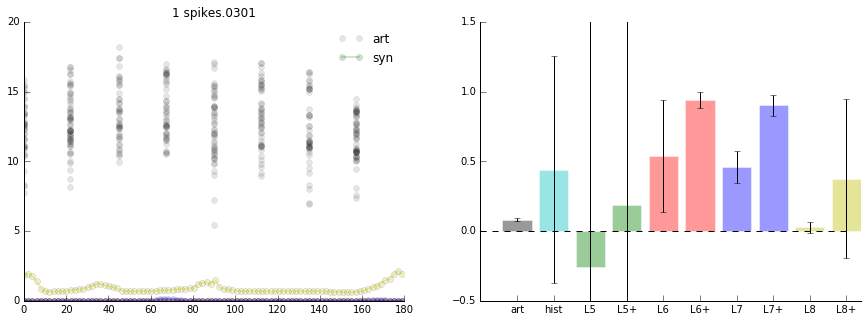

(art, syn): -0.613504
(art, syn): -0.320148
(art, syn): 0.093721
(art, syn): -0.522422


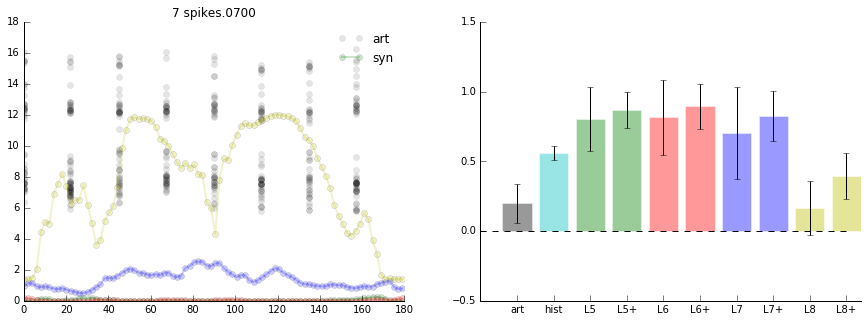

(art, syn): -0.239642
(art, syn): -0.427478
(art, syn): 0.358185
(art, syn): 0.550952


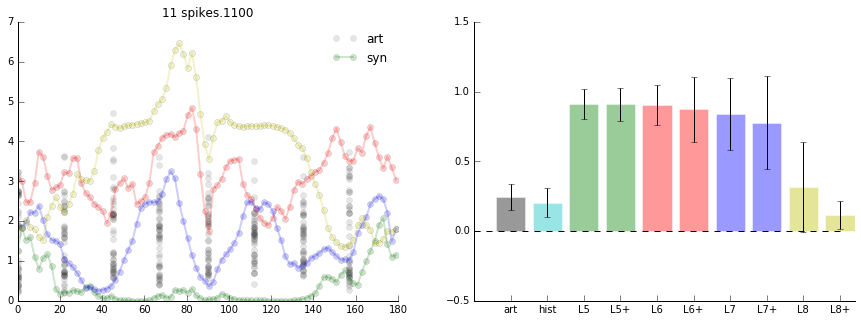

(art, syn): -0.318200
(art, syn): 0.324318
(art, syn): 0.005225
(art, syn): 0.301500


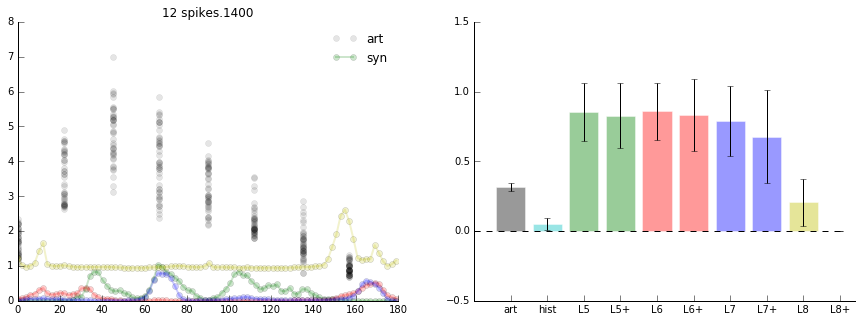

(art, syn): 0.423713
(art, syn): -0.331188
(art, syn): -0.042030
(art, syn): -0.393412


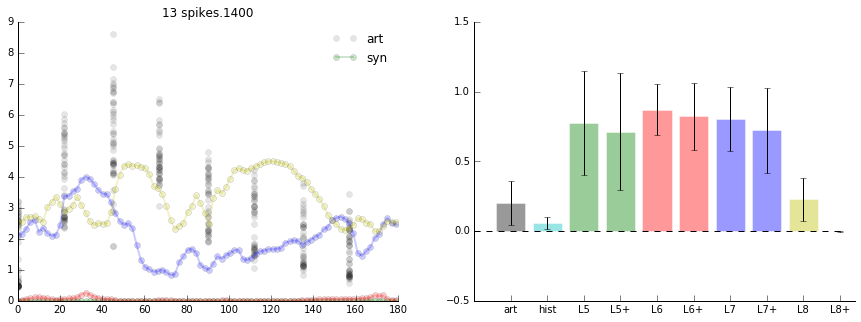

(art, syn): -0.392004
(art, syn): -0.094307
(art, syn): 0.112934
(art, syn): 0.218945


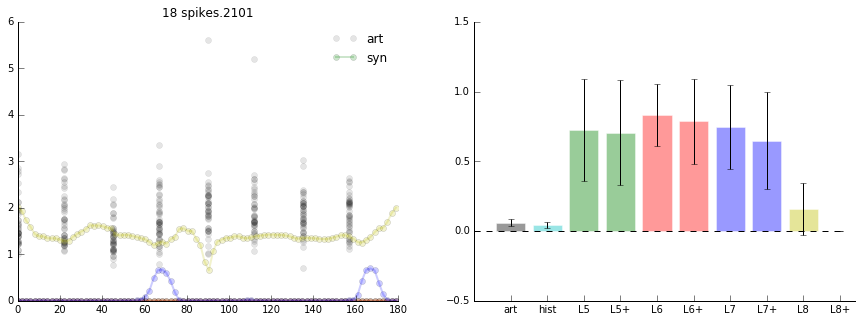

(art, syn): -0.132404
(art, syn): 0.340482
(art, syn): 0.149661
(art, syn): 0.310883


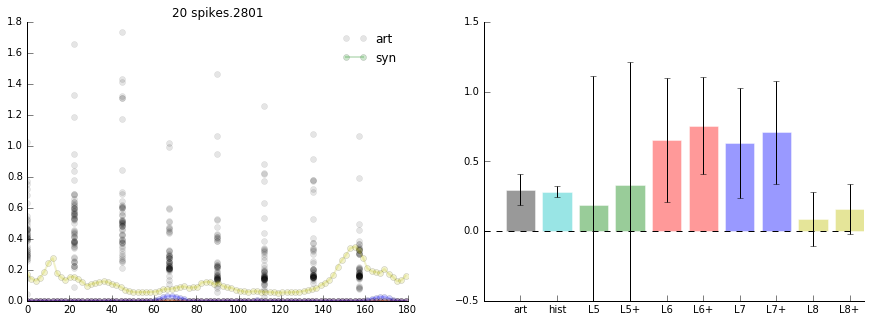

(art, syn): -0.301745
(art, syn): -0.219545
(art, syn): -0.187513
(art, syn): -0.132173


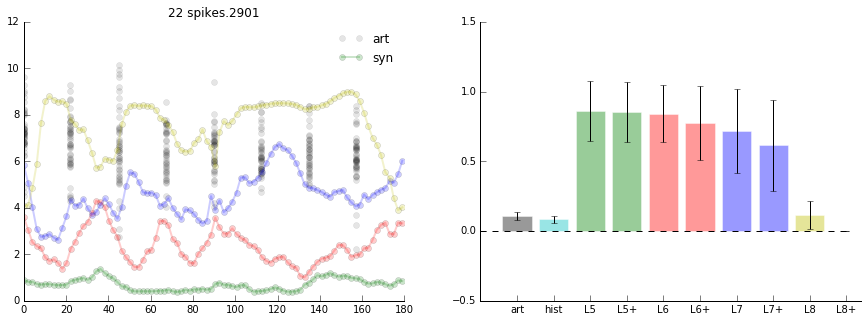

(art, syn): 0.051317
(art, syn): -0.052902
(art, syn): -0.414390
(art, syn): 0.079796


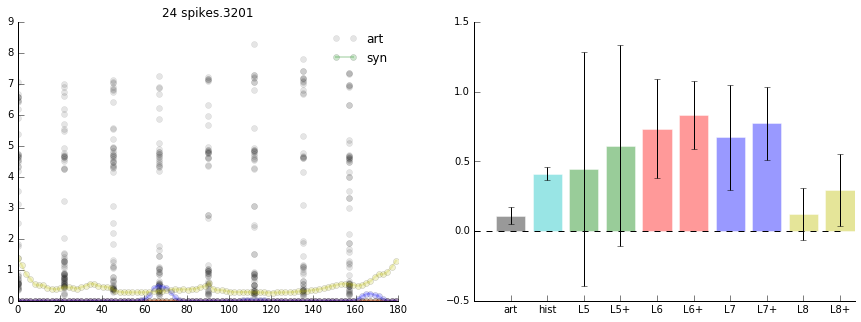

(art, syn): -0.124749
(art, syn): -0.118694
(art, syn): 0.000716
(art, syn): -0.627609


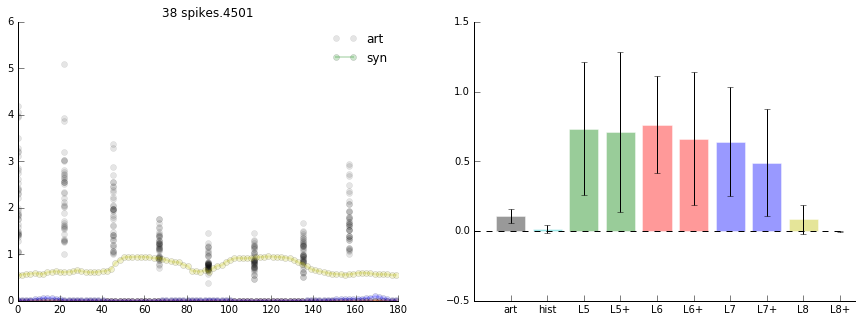

(art, syn): 0.139729
(art, syn): -0.310718
(art, syn): 0.541005
(art, syn): -0.689102


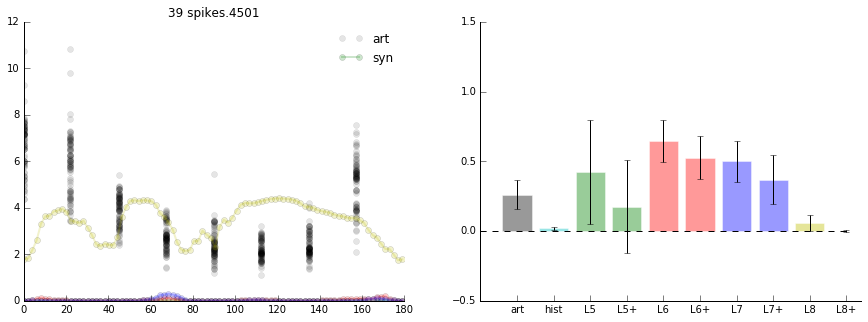

(art, syn): 0.040838
(art, syn): 0.363317
(art, syn): -0.044553
(art, syn): -0.561315


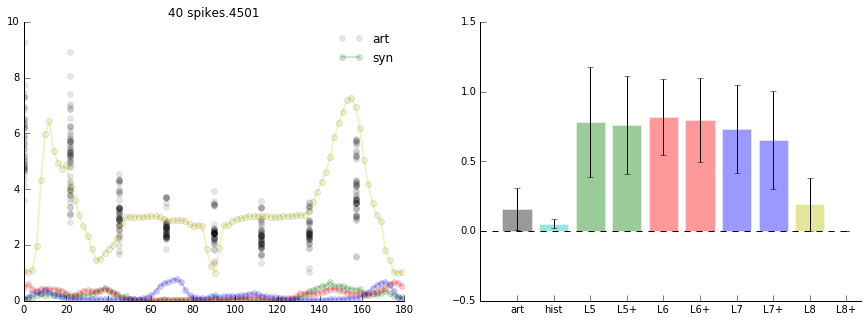

(art, syn): 0.216772
(art, syn): 0.775923
(art, syn): 0.190970
(art, syn): -0.147936


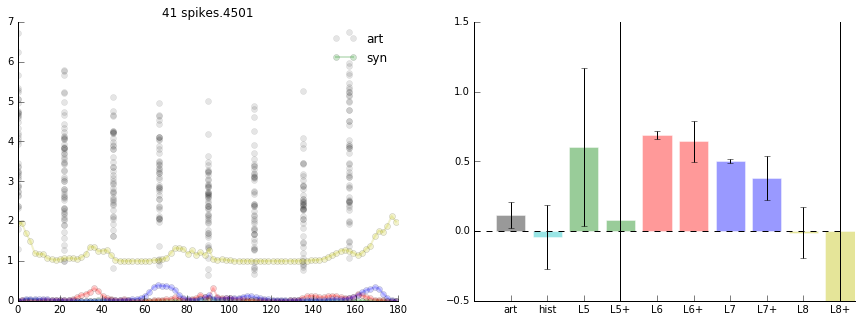

(art, syn): -0.120731
(art, syn): -0.090678
(art, syn): 0.204306
(art, syn): 0.805701


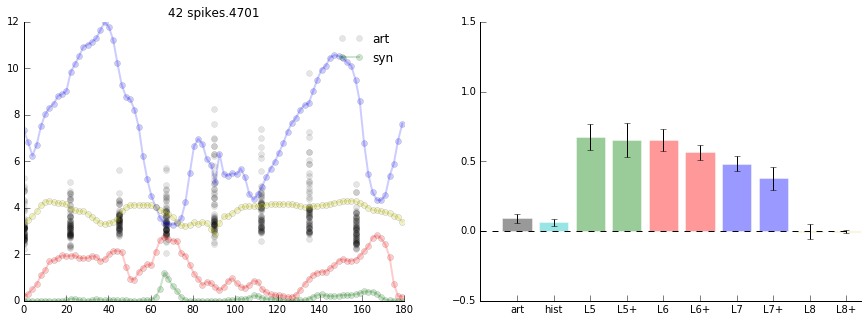

(art, syn): 0.002450
(art, syn): -0.298020
(art, syn): -0.016193
(art, syn): 0.123715


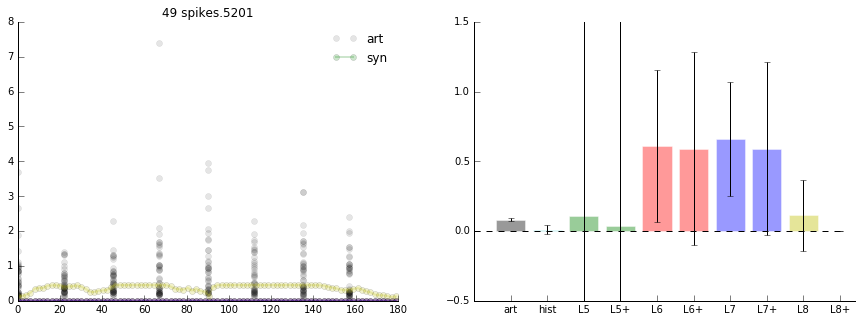

(art, syn): -0.159824
(art, syn): -0.124638
(art, syn): -0.014710
(art, syn): 0.329122


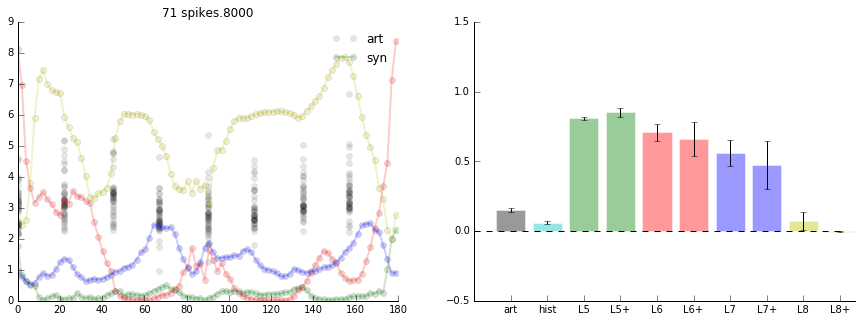

(art, syn): -0.402211
(art, syn): 0.037556
(art, syn): -0.255852
(art, syn): 0.550225


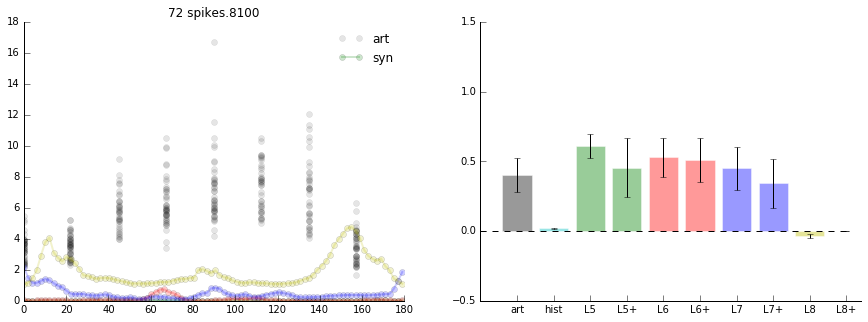

(art, syn): -0.305570
(art, syn): 0.180497
(art, syn): -0.487213
(art, syn): -0.236311


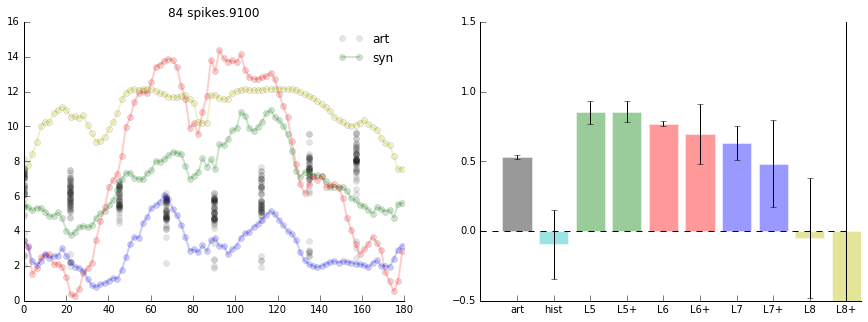

(art, syn): -0.334434
(art, syn): -0.503711
(art, syn): -0.433653
(art, syn): -0.229760


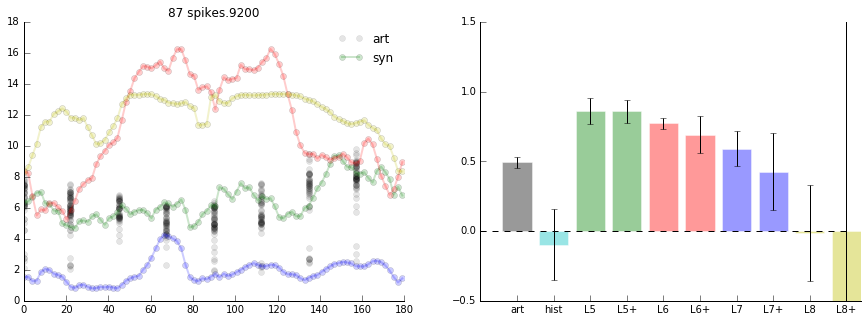

(art, syn): 0.653092
(art, syn): -0.529479
(art, syn): 0.054499
(art, syn): -0.260445


In [73]:
art_syn1_corr = list()
art_syn2_corr = list()
art_syn3_corr = list()
art_syn4_corr = list()
        
art_pseudo_R2 = dict()
art_pseudo_R2['mean'] = list()
art_pseudo_R2['std'] = list()
art_model_name = 'art_orientation_model'

syn_pseudo_R2 = dict()
syn_pseudo_R2['mean'] = list()
syn_pseudo_R2['std'] = list()

syn_model1_name = 'vggl5_model'
syn_model1_prediction = 'vggl5_orientation_prediction'
syn_model2_name = 'vggl6_model'
syn_model2_prediction = 'vggl6_orientation_prediction'
syn_model3_name = 'vggl7_model'
syn_model3_prediction = 'vggl7_orientation_prediction'
syn_model4_name = 'vggl8_model'
syn_model4_prediction = 'vggl8_orientation_prediction'

art_entropy = list()
syn_entropy = list()

for neuron_id, neuron_name in enumerate(df_results_all['name']):
#for neuron_id in [12, 13, 14, 34, 38, 39, 40, 41, 72, 76, 77, 84, 85, 86, 87]:
    #neuron_id = 40
    #neuron_name = 'spikes.4501'
    neuron_name = df_neurons.loc[neuron_id]['name']
    #if ((np.mean(df_results_all[syn_model_name][neuron_id]['image_model']['pseudo_R2']) - \
    #     1.96 * np.std(df_results_all[syn_model_name][neuron_id]['image_model']['pseudo_R2']) > 0.) & \
    #    (np.mean(df_results_all[art_model_name][neuron_id]['pseudo_R2']) - \
    #     1.96 * np.std(df_results_all[art_model_name][neuron_id]['pseudo_R2']) > 0.)):
    if (np.mean(df_results_all[art_model_name][neuron_id]['pseudo_R2']) - \
         1.96 * np.std(df_results_all[art_model_name][neuron_id]['pseudo_R2']) > 0.):
    #if(True):
        plt.figure(figsize=(15,5))


        # Collect all pseudo R2s
        #art_pseudo_R2['mean'].append(np.mean(df_results_all[art_model_name][neuron_id]['pseudo_R2']))
        #art_pseudo_R2['std'].append(np.std(df_results_all[art_model_name][neuron_id]['pseudo_R2']))
        #syn_pseudo_R2['mean'].append(np.mean(df_results_all[syn_model_name][neuron_id]['image_model']['pseudo_R2']))
        #syn_pseudo_R2['std'].append(np.std(df_results_all[syn_model_name][neuron_id]['image_model']['pseudo_R2']))

        # Check if the model was fit
        if(len(df_results_all[art_model_name][neuron_id]['ori']) == 0):
            continue
            
        # Fit a polynomial to the art tuning curve
        f_poly = np.poly1d(np.polyfit(df_results_all[art_model_name][neuron_id]['ori'], 
                  df_results_all[art_model_name][neuron_id]['predicted_spike_counts'],
                  5))        
        art_grating_ori = f_poly(df_results_all[syn_model1_prediction][neuron_id]['ori'])

        #--------------------
        # Plot tuning curves
        #--------------------
        ax = plt.subplot(121)
        V4.simpleaxis(ax)
        
        # Plot art
        ax.plot(df_results_all[art_model_name][neuron_id]['ori'], 
                df_results_all[art_model_name][neuron_id]['predicted_spike_counts'], 'ko', alpha=0.1)

        # Plot syn
        this_model = df_results_all[syn_model1_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'go-', alpha=0.2, lw=2)
        this_model = df_results_all[syn_model2_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'ro-', alpha=0.2, lw=2)
        this_model = df_results_all[syn_model3_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'bo-', alpha=0.2, lw=2)
        this_model = df_results_all[syn_model4_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'yo-', alpha=0.2, lw=2)
        ax.legend(['art', 'syn'], frameon=False)
        plt.title(str(neuron_id)+' '+neuron_name)

        #--------------------
        # Plot pseudo-R2s
        #--------------------
        ax= plt.subplot(122)
        V4.simpleaxis(ax)
        ax.bar(left=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], width=0.8, align='center', alpha=0.4,
               height=[np.mean(df_results_all[art_model_name][neuron_id]['pseudo_R2']),
                       np.mean(df_fits_all['histogram_model'][neuron_id]['pseudo_R2']),
                       np.mean(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model1_name][neuron_id]['joint_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model2_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model2_name][neuron_id]['joint_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model3_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model3_name][neuron_id]['joint_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model4_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model4_name][neuron_id]['joint_model']['pseudo_R2'])],
               yerr=[1.96*np.std(df_results_all[art_model_name][neuron_id]['pseudo_R2']),
                     1.96*np.std(df_fits_all['histogram_model'][neuron_id]['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model1_name][neuron_id]['joint_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model2_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model2_name][neuron_id]['joint_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model3_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model3_name][neuron_id]['joint_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model4_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model4_name][neuron_id]['joint_model']['pseudo_R2'])],
               color=['k', 'c', 'g', 'g', 'r', 'r', 'b', 'b', 'y', 'y'],
               ecolor='k', ec='w', tick_label=['art', 'hist', 'L5', 'L5+', 'L6', 'L6+', 'L7', 'L7+', 'L8', 'L8+'])

        plt.plot(range(11), np.zeros(11), 'k--')
        plt.ylim([-0.5, 1.5])
        plt.savefig('../04-figures_cosyne2017/tune_and_pseudor2/ori_tune_'+re.split('\.', neuron_name)[-1]+'_'+str(neuron_id)+'.pdf', format='pdf')
        plt.show()

        # Compute and display correlations
        this_art_syn_corr = np.corrcoef(art_grating_ori, 
                                        df_results_all[syn_model1_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn1_corr.append(this_art_syn_corr)
        this_art_syn_corr = np.corrcoef(art_grating_ori, 
                                        df_results_all[syn_model2_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn2_corr.append(this_art_syn_corr)
        this_art_syn_corr = np.corrcoef(art_grating_ori, 
                                        df_results_all[syn_model3_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn3_corr.append(this_art_syn_corr)
        this_art_syn_corr = np.corrcoef(art_grating_ori, 
                                        df_results_all[syn_model4_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn4_corr.append(this_art_syn_corr)

        print "(art, syn): %f" % art_syn1_corr[-1]
        print "(art, syn): %f" % art_syn2_corr[-1]
        print "(art, syn): %f" % art_syn3_corr[-1]
        print "(art, syn): %f" % art_syn4_corr[-1]

#art_syn_corr = np.array(art_syn_corr)

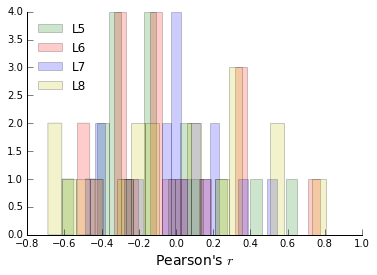

In [74]:
plt.figure()
ax = plt.subplot(111)
ax.hist(art_syn1_corr, 20, color='g', alpha=0.2)
ax.hist(art_syn2_corr, 20, color='r', alpha=0.2)
ax.hist(art_syn3_corr, 20, color='b', alpha=0.2)
ax.hist(art_syn4_corr, 20, color='y', alpha=0.2)
plt.legend(['L5', 'L6', 'L7', 'L8'], loc='upper left', frameon=False)
plt.xlabel('Pearson\'s $r$', fontsize=14)
V4.simpleaxis(ax)
#ax.plot(np.arange(60), np.zeros(60), 'k--')
#plt.xlim([-1, 60])
#plt.xlabel('neuron', fontsize=14)
plt.savefig('../04-figures_cosyne2017/tune_and_pseudor2/ori_tune_corr_histogram.pdf', format='pdf')
plt.show()

### Tuning curves and pseudo R2s (hue)

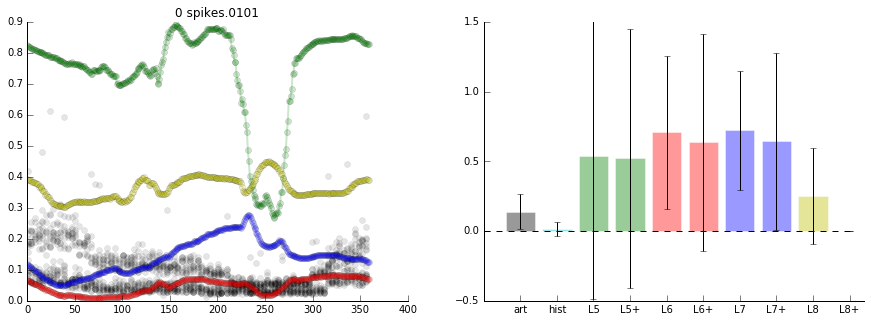

(art, syn): 0.357120
(art, syn): -0.211835
(art, syn): -0.761621
(art, syn): -0.468212


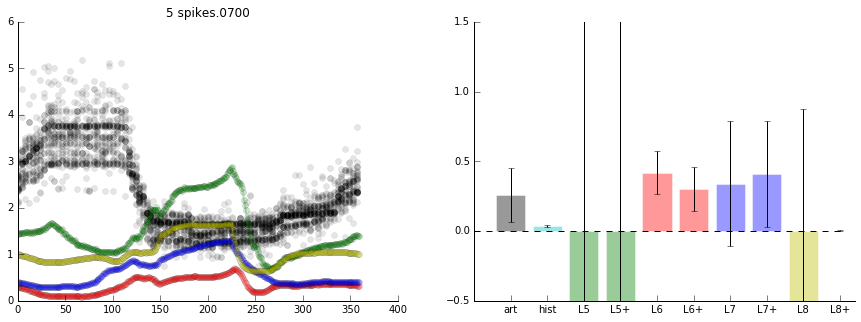

(art, syn): -0.400339
(art, syn): -0.772872
(art, syn): -0.628553
(art, syn): -0.459780


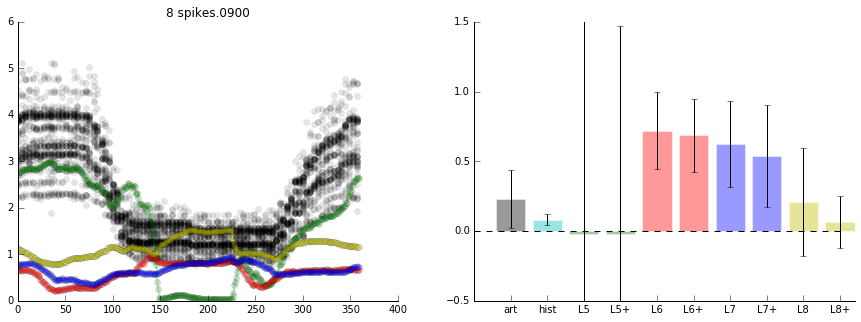

(art, syn): 0.902843
(art, syn): -0.569917
(art, syn): -0.529283
(art, syn): -0.612806


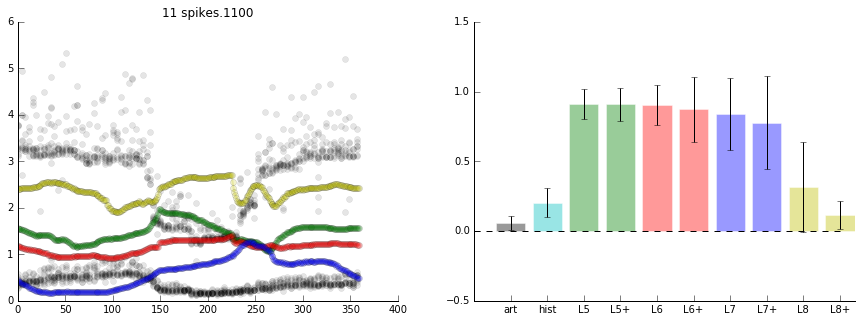

(art, syn): -0.367434
(art, syn): -0.705129
(art, syn): -0.635418
(art, syn): -0.262287


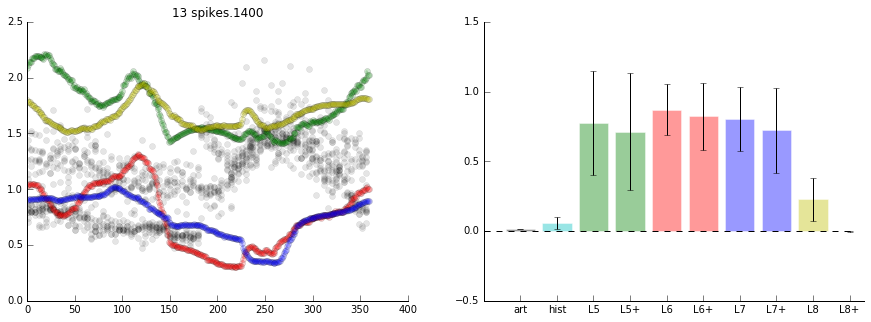

(art, syn): -0.533991
(art, syn): -0.605407
(art, syn): -0.718378
(art, syn): -0.293787


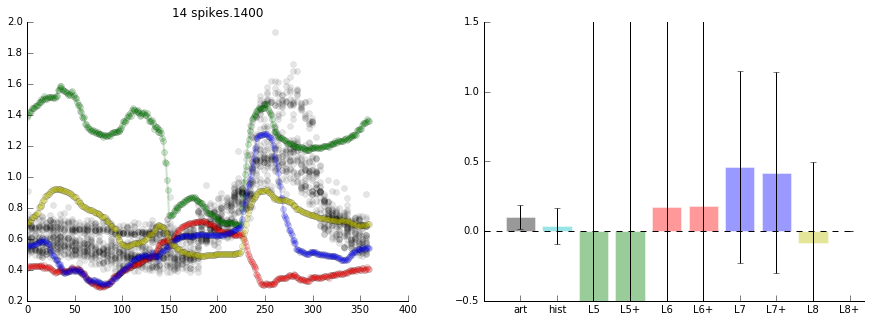

(art, syn): -0.164141
(art, syn): -0.182708
(art, syn): 0.619221
(art, syn): 0.338007


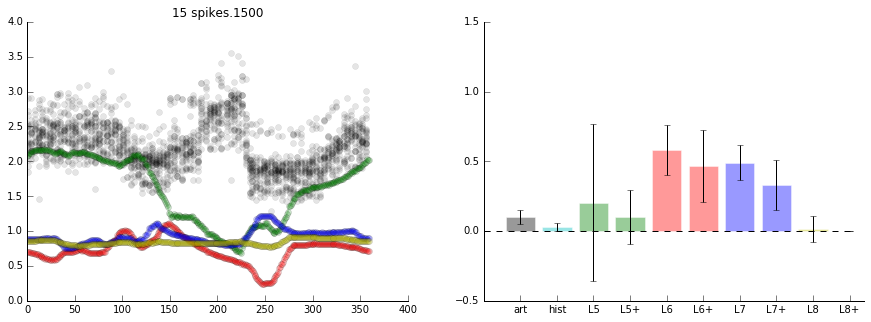

(art, syn): 0.208093
(art, syn): -0.141177
(art, syn): -0.481816
(art, syn): -0.493354


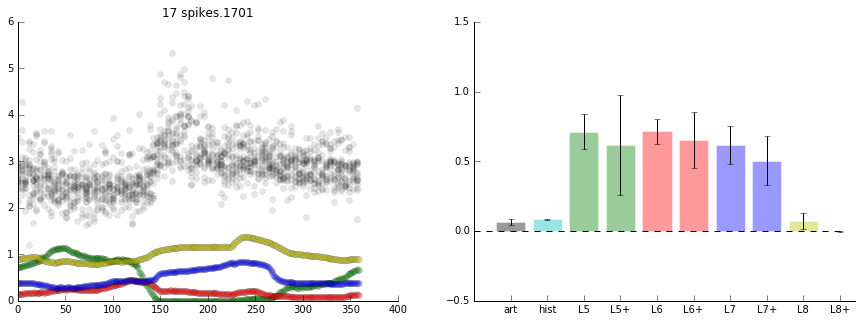

(art, syn): -0.937979
(art, syn): -0.251265
(art, syn): 0.873879
(art, syn): 0.870554


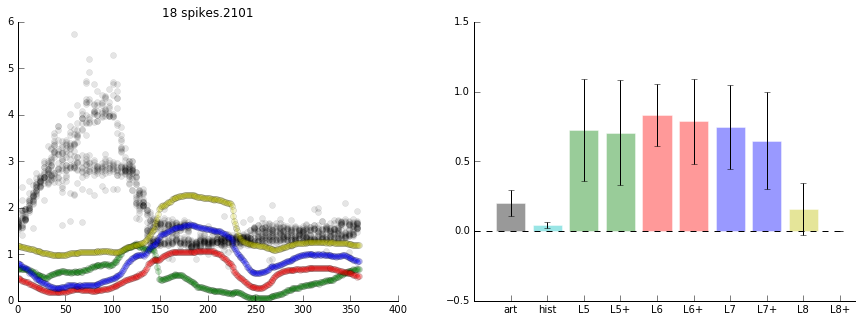

(art, syn): 0.610096
(art, syn): -0.674968
(art, syn): -0.719533
(art, syn): -0.540018


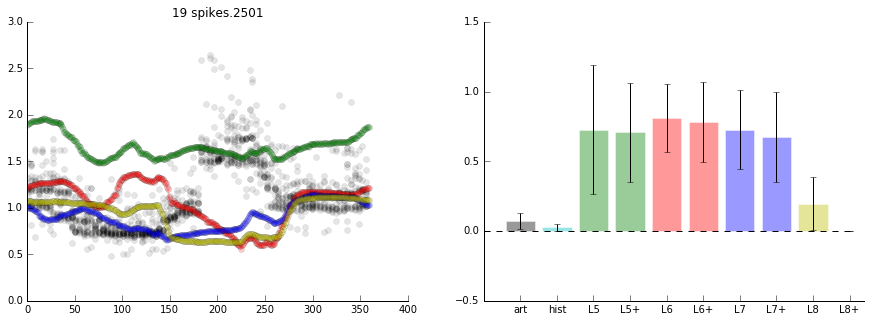

(art, syn): 0.083904
(art, syn): -0.763219
(art, syn): -0.034995
(art, syn): -0.606391


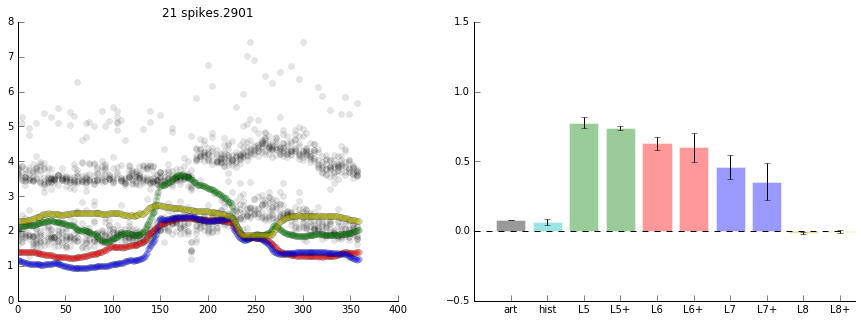

(art, syn): 0.019097
(art, syn): 0.240572
(art, syn): 0.471355
(art, syn): -0.548262


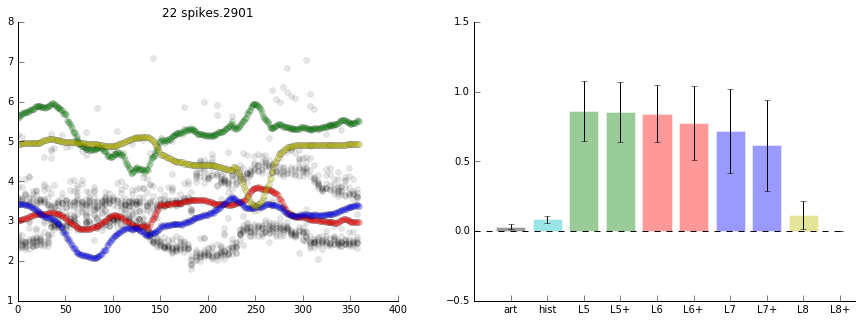

(art, syn): 0.120144
(art, syn): 0.078932
(art, syn): -0.060431
(art, syn): -0.129315


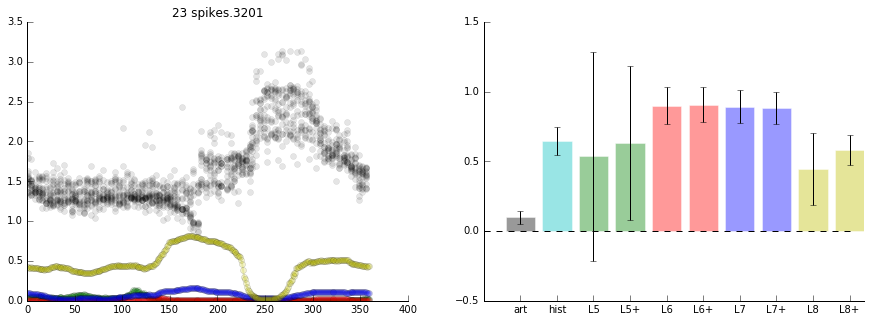

(art, syn): -0.616349
(art, syn): 0.003035
(art, syn): 0.011571
(art, syn): -0.360458


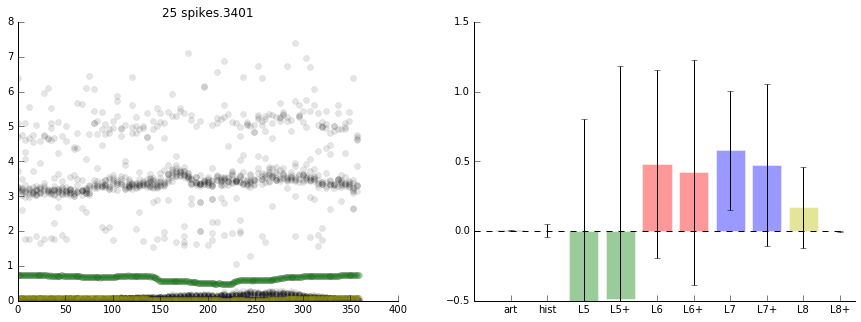

(art, syn): -0.319717
(art, syn): 0.465261
(art, syn): 0.338445
(art, syn): -0.428485


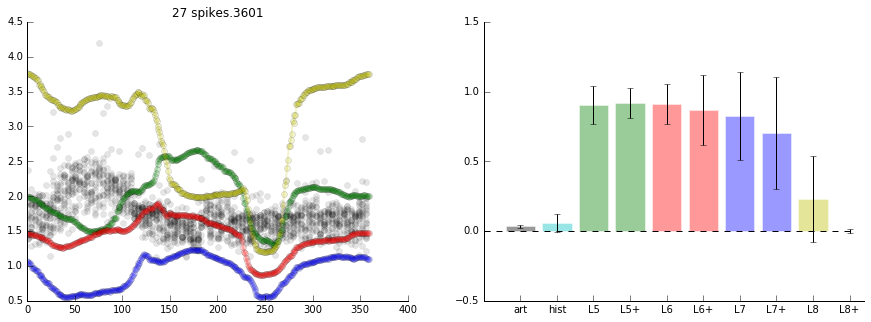

(art, syn): -0.498004
(art, syn): 0.042283
(art, syn): -0.654691
(art, syn): 0.507025


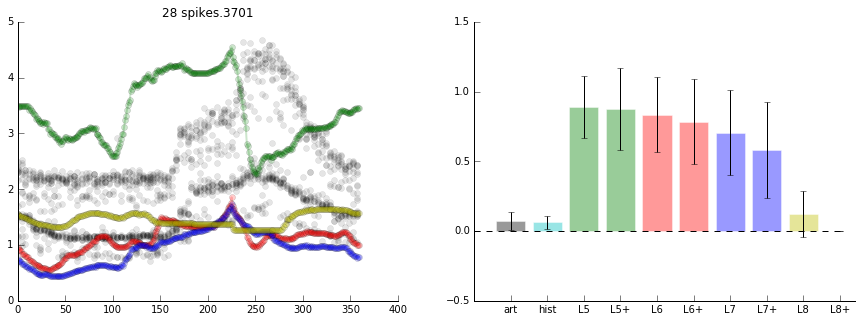

(art, syn): -0.061012
(art, syn): 0.484268
(art, syn): 0.757982
(art, syn): -0.475399


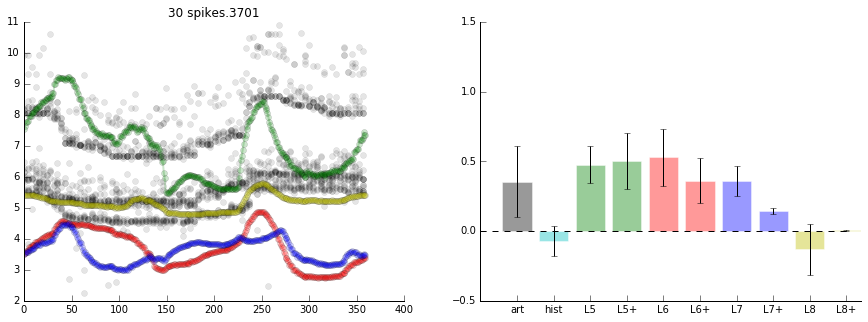

(art, syn): -0.108082
(art, syn): -0.280311
(art, syn): 0.228670
(art, syn): 0.543145


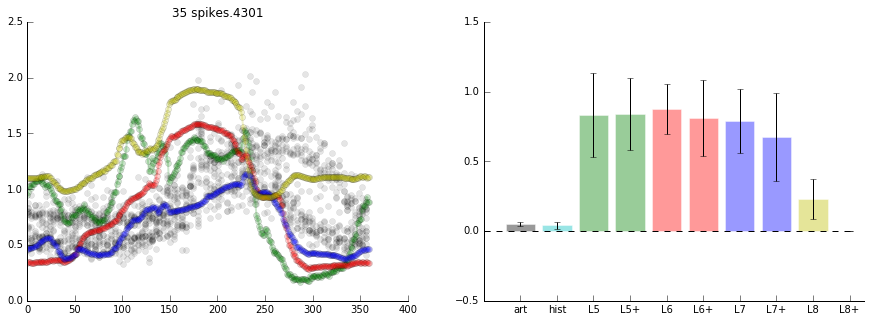

(art, syn): -0.047196
(art, syn): 0.496236
(art, syn): 0.719773
(art, syn): 0.258784


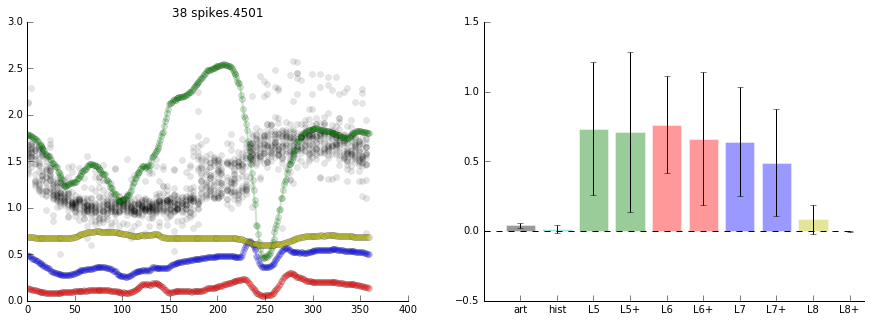

(art, syn): 0.050861
(art, syn): 0.567102
(art, syn): 0.822608
(art, syn): -0.482715


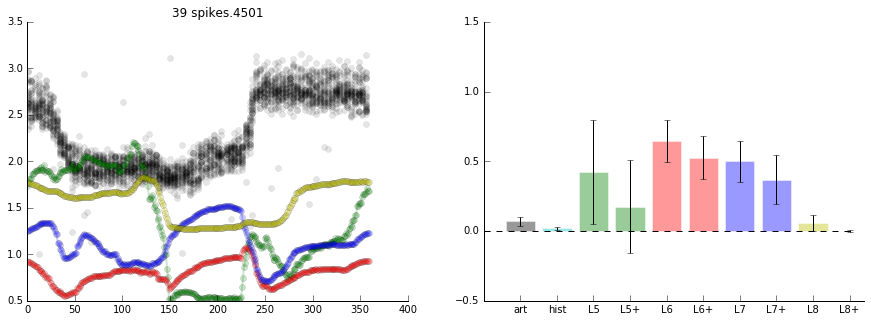

(art, syn): -0.215408
(art, syn): 0.111650
(art, syn): -0.059983
(art, syn): 0.236897


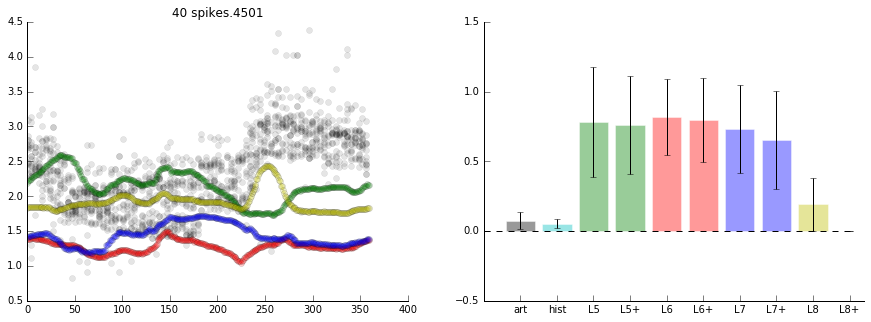

(art, syn): -0.485275
(art, syn): 0.119088
(art, syn): -0.292470
(art, syn): -0.121142


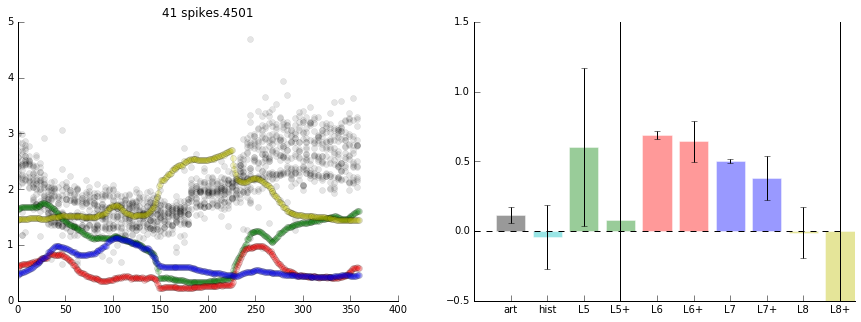

(art, syn): 0.400279
(art, syn): 0.298139
(art, syn): -0.823568
(art, syn): -0.122900


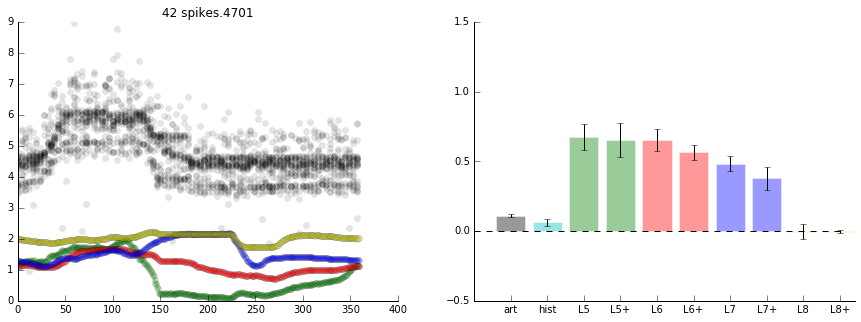

(art, syn): 0.800592
(art, syn): 0.907268
(art, syn): -0.022976
(art, syn): 0.111184


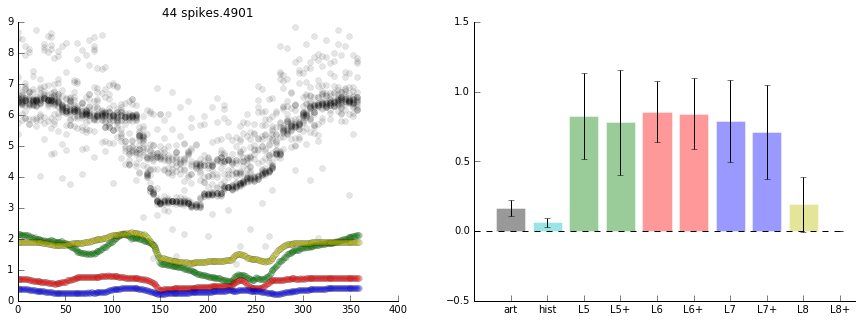

(art, syn): 0.800760
(art, syn): 0.726373
(art, syn): 0.298825
(art, syn): 0.740516


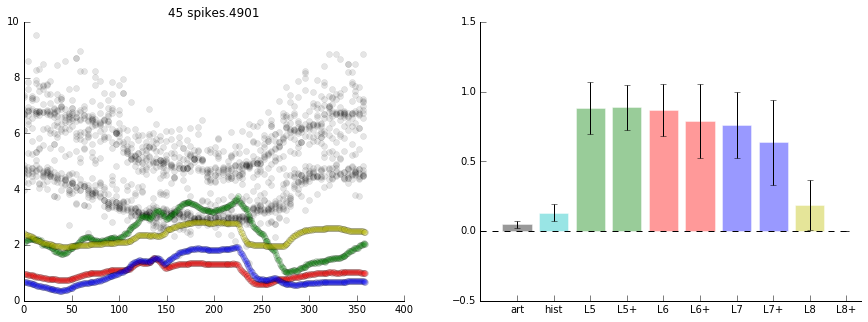

(art, syn): -0.815234
(art, syn): -0.569332
(art, syn): -0.889692
(art, syn): -0.361874


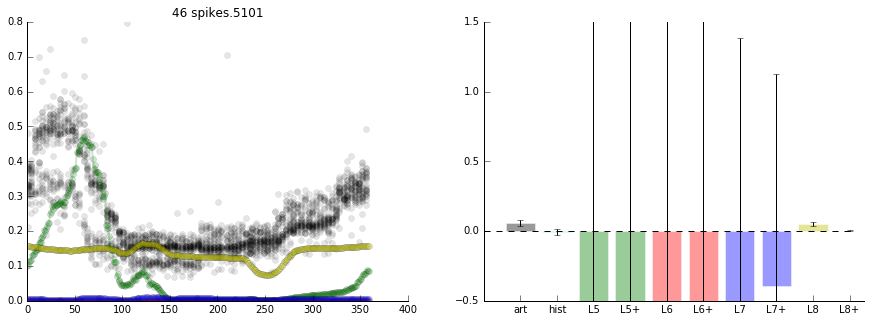

(art, syn): 0.712331
(art, syn): -0.076859
(art, syn): -0.449693
(art, syn): 0.360184


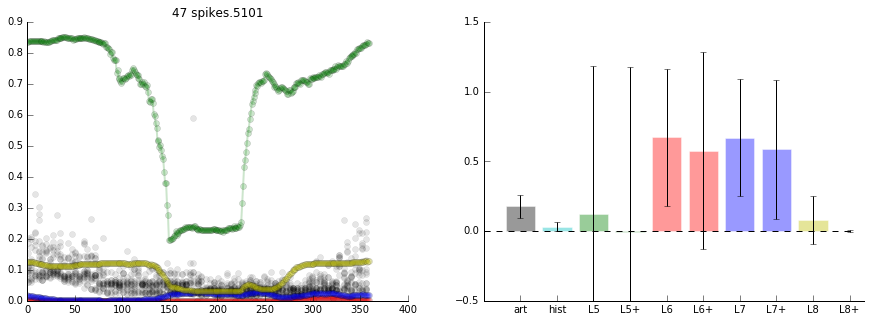

(art, syn): 0.613434
(art, syn): -0.072746
(art, syn): -0.495379
(art, syn): 0.619715


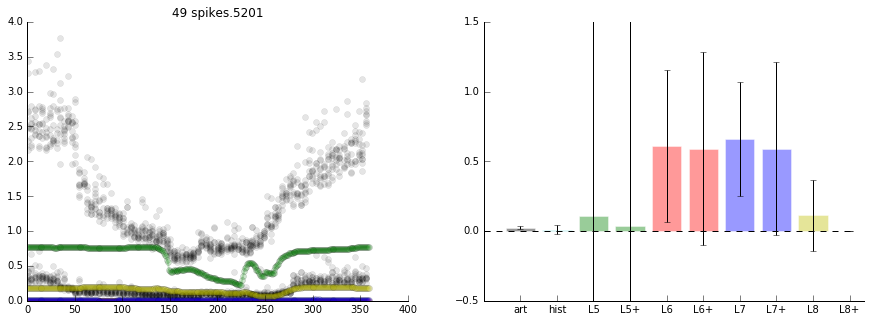

(art, syn): 0.680138
(art, syn): 0.525934
(art, syn): 0.254421
(art, syn): 0.594291


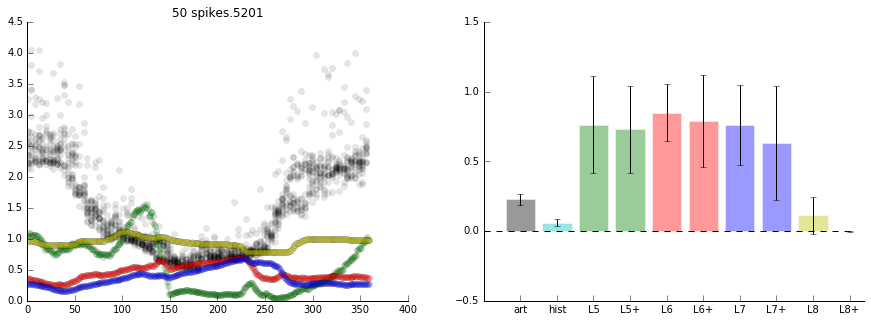

(art, syn): 0.311613
(art, syn): -0.865916
(art, syn): -0.773192
(art, syn): 0.065810


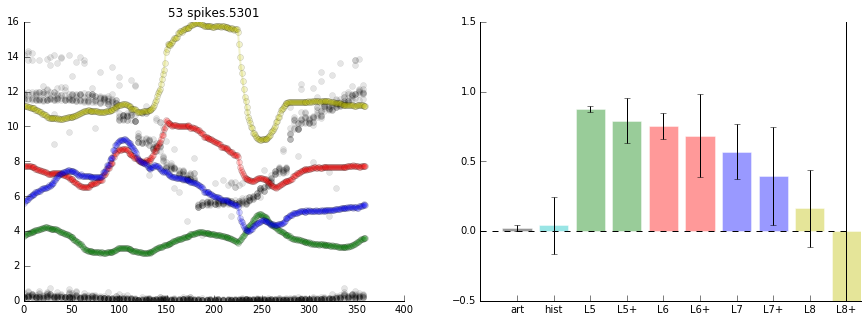

(art, syn): -0.432988
(art, syn): -0.430516
(art, syn): 0.314717
(art, syn): -0.602725


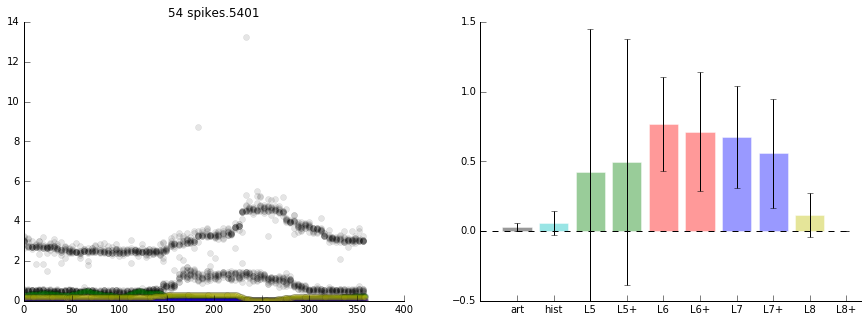

(art, syn): -0.881365
(art, syn): -0.407095
(art, syn): 0.451892
(art, syn): -0.205136


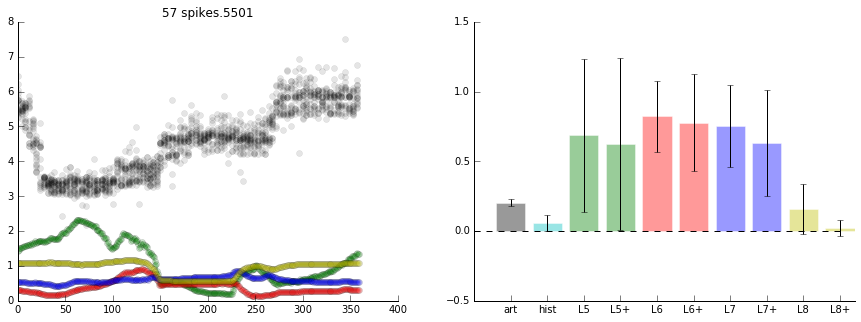

(art, syn): -0.637049
(art, syn): -0.365306
(art, syn): 0.169671
(art, syn): -0.061617


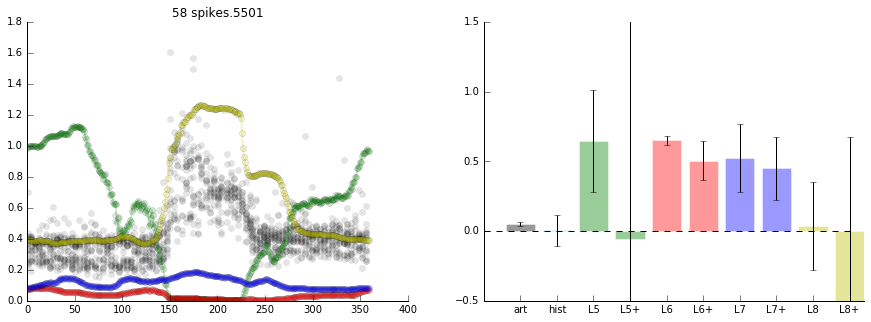

(art, syn): -0.901079
(art, syn): -0.635335
(art, syn): 0.596587
(art, syn): 0.875633


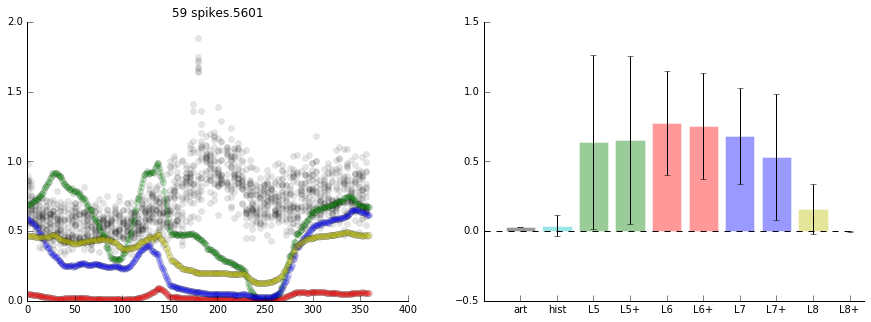

(art, syn): -0.514832
(art, syn): 0.064567
(art, syn): -0.271928
(art, syn): -0.637356


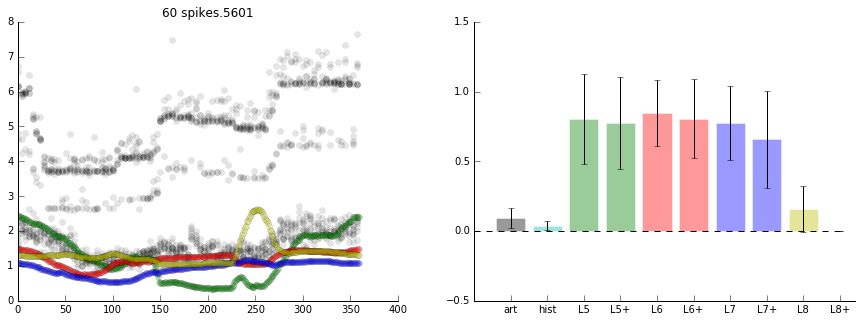

(art, syn): 0.353354
(art, syn): 0.834014
(art, syn): 0.856617
(art, syn): 0.258400


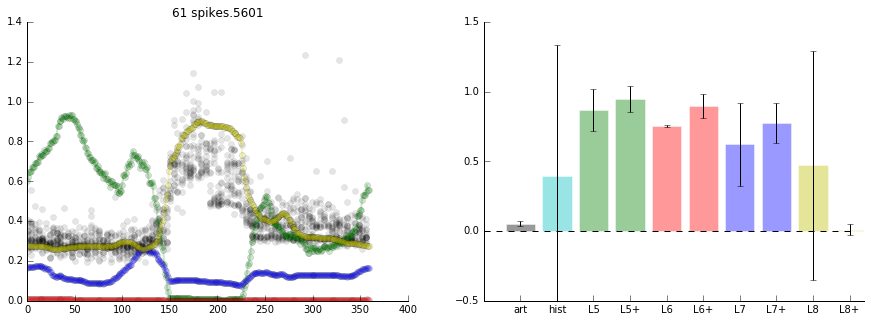

(art, syn): -0.794756
(art, syn): -0.563429
(art, syn): -0.088679
(art, syn): 0.847290


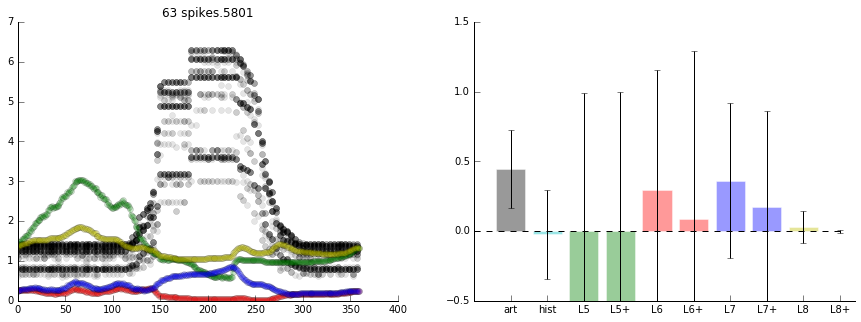

(art, syn): -0.614952
(art, syn): -0.777032
(art, syn): 0.826159
(art, syn): -0.643783


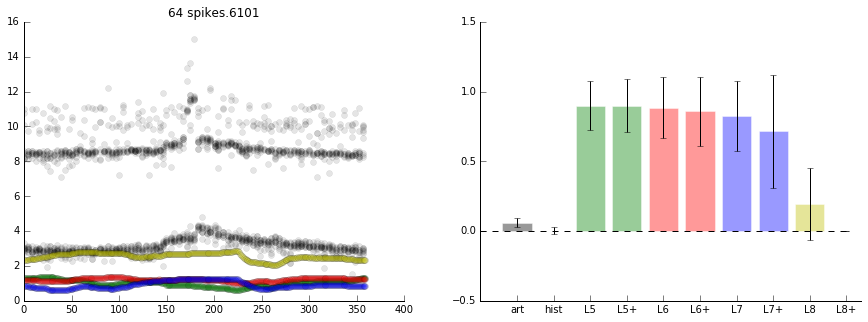

(art, syn): -0.781026
(art, syn): -0.441479
(art, syn): 0.802854
(art, syn): 0.095766


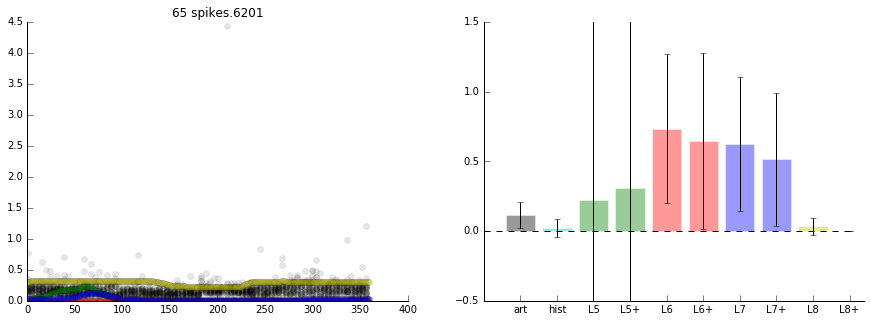

(art, syn): 0.001878
(art, syn): -0.141658
(art, syn): -0.073837
(art, syn): 0.255559


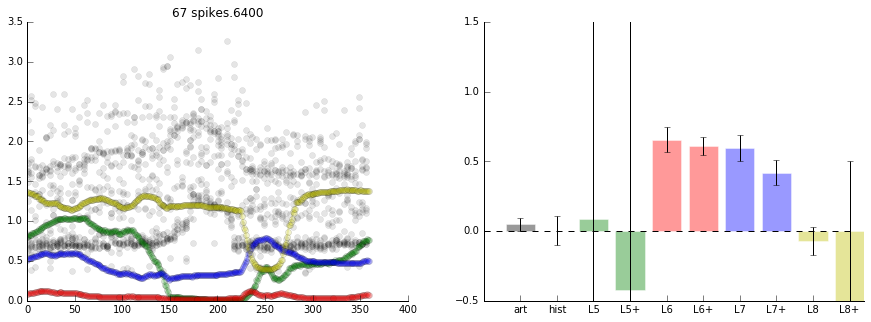

(art, syn): -0.601206
(art, syn): -0.498177
(art, syn): -0.694239
(art, syn): -0.049905


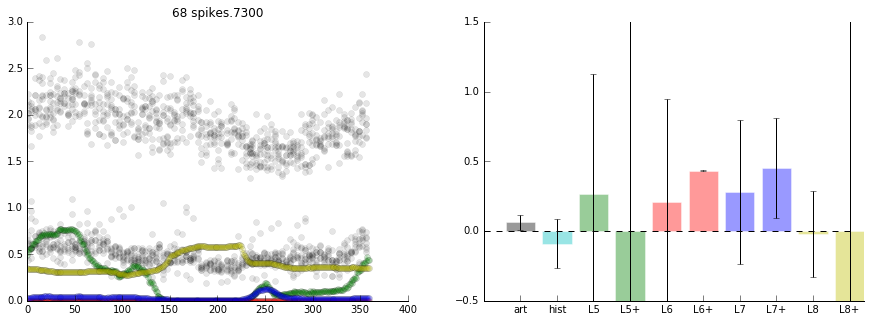

(art, syn): 0.829268
(art, syn): 0.685461
(art, syn): -0.060238
(art, syn): -0.513232


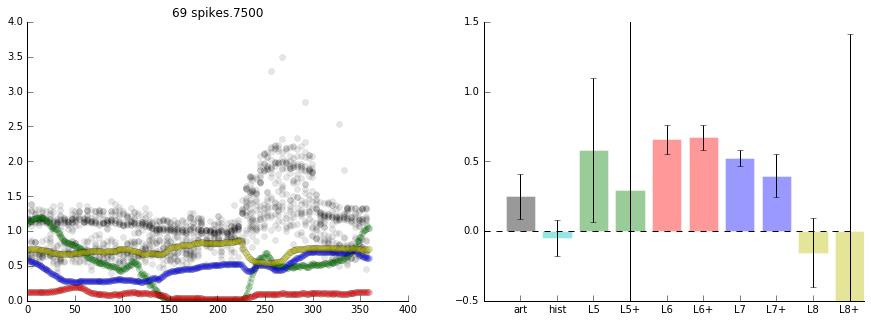

(art, syn): -0.078123
(art, syn): -0.104924
(art, syn): 0.514161
(art, syn): -0.239881


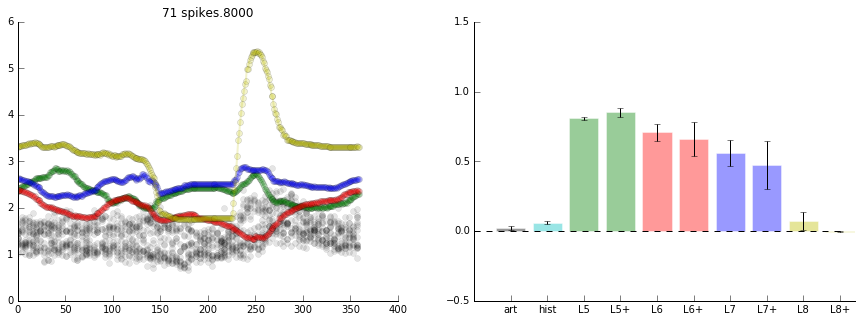

(art, syn): -0.223899
(art, syn): -0.114074
(art, syn): 0.089867
(art, syn): 0.571807


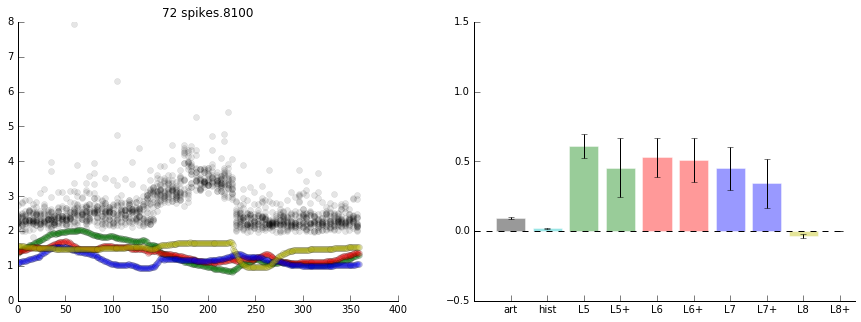

(art, syn): -0.166951
(art, syn): -0.077560
(art, syn): 0.003470
(art, syn): 0.217470


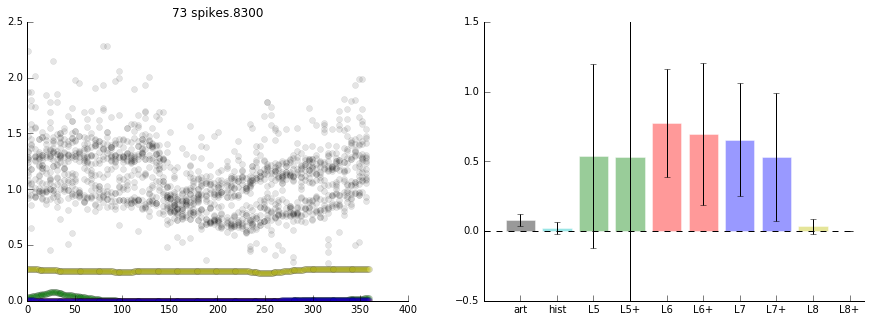

(art, syn): 0.668320
(art, syn): 0.225322
(art, syn): 0.086121
(art, syn): 0.397616


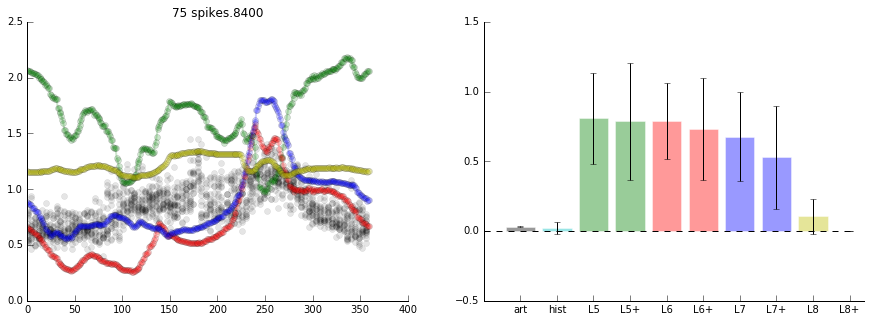

(art, syn): -0.412962
(art, syn): 0.540357
(art, syn): 0.440666
(art, syn): 0.534729


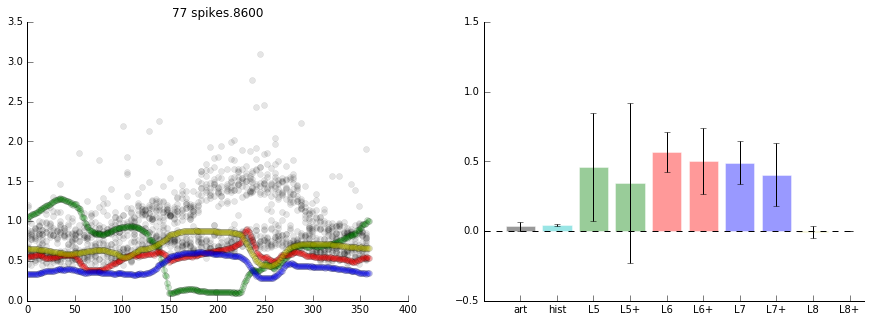

(art, syn): -0.881026
(art, syn): 0.597344
(art, syn): 0.569390
(art, syn): 0.352742


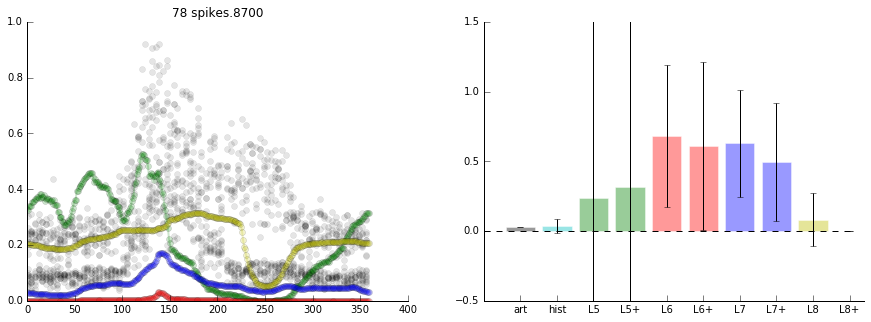

(art, syn): -0.087435
(art, syn): 0.555402
(art, syn): 0.807494
(art, syn): 0.588383


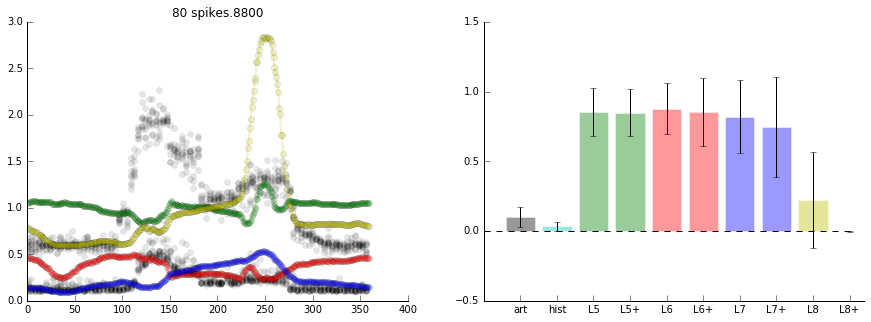

(art, syn): -0.478369
(art, syn): -0.214416
(art, syn): 0.525029
(art, syn): 0.165021


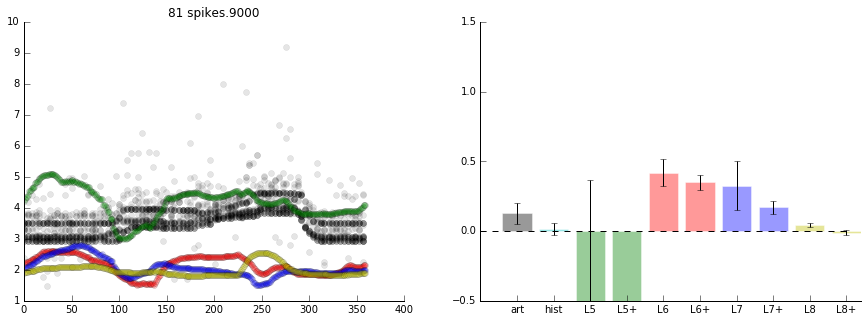

(art, syn): -0.001999
(art, syn): -0.034957
(art, syn): -0.580287
(art, syn): 0.194547


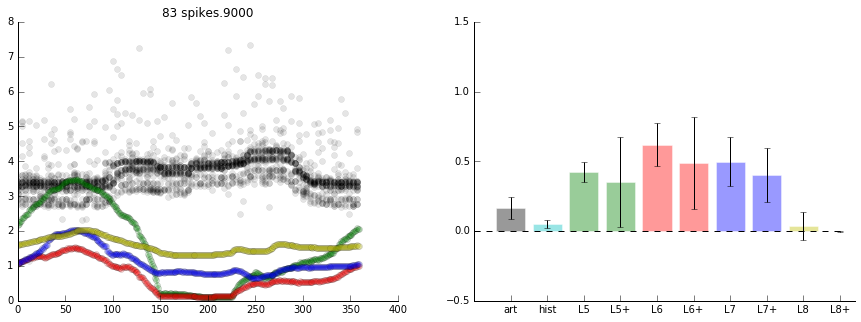

(art, syn): -0.822943
(art, syn): -0.818698
(art, syn): -0.687740
(art, syn): -0.680047


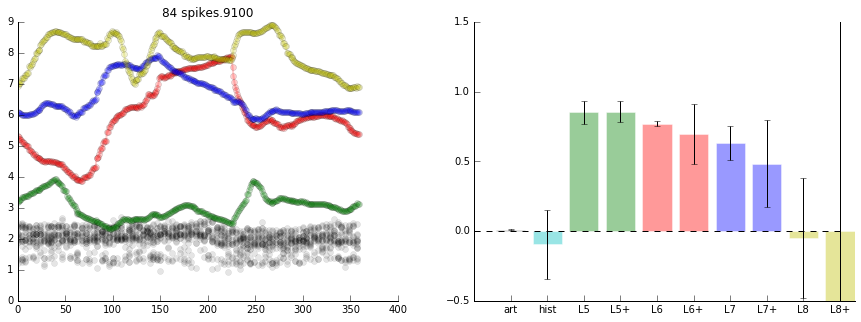

(art, syn): -0.396752
(art, syn): -0.114203
(art, syn): 0.670839
(art, syn): -0.029646


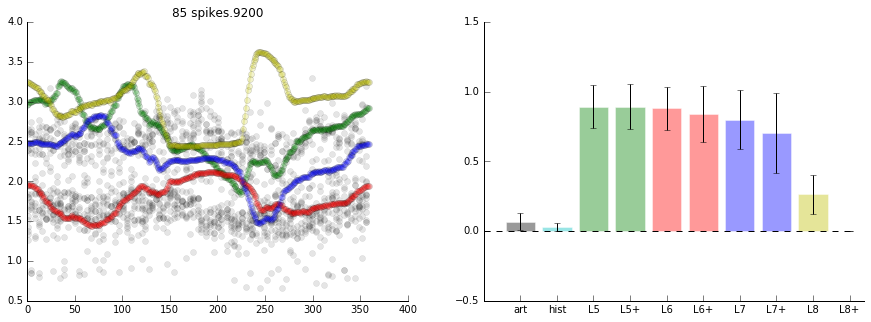

(art, syn): 0.343768
(art, syn): 0.450283
(art, syn): 0.536192
(art, syn): -0.279850


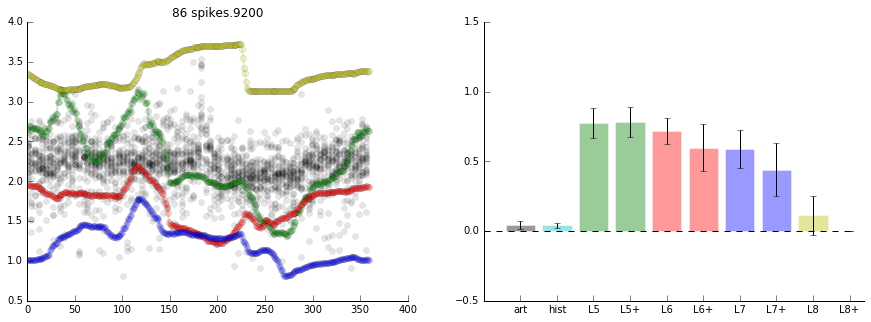

(art, syn): 0.746722
(art, syn): 0.434868
(art, syn): 0.617327
(art, syn): 0.299818


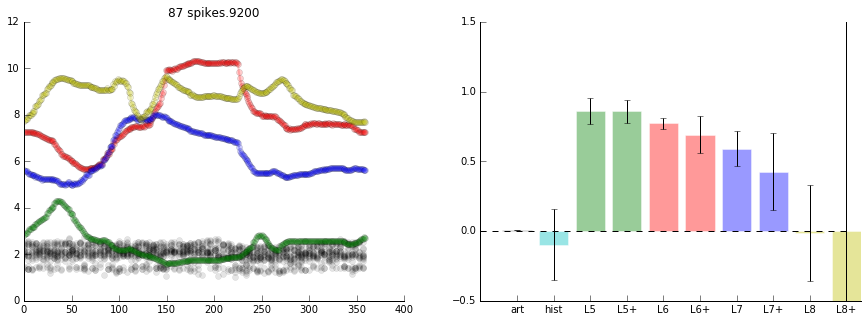

(art, syn): 0.139327
(art, syn): -0.338846
(art, syn): 0.352029
(art, syn): 0.018775


In [75]:
import re
art_syn1_corr = list()
art_syn2_corr = list()
art_syn3_corr = list()
art_syn4_corr = list()
        
art_pseudo_R2 = dict()
art_pseudo_R2['mean'] = list()
art_pseudo_R2['std'] = list()
art_model_name = 'art_model'

syn_pseudo_R2 = dict()
syn_pseudo_R2['mean'] = list()
syn_pseudo_R2['std'] = list()

syn_model1_name = 'vggl5_model'
syn_model1_prediction = 'vggl5_hue_prediction'
syn_model2_name = 'vggl6_model'
syn_model2_prediction = 'vggl6_hue_prediction'
syn_model3_name = 'vggl7_model'
syn_model3_prediction = 'vggl7_hue_prediction'
syn_model4_name = 'vggl8_model'
syn_model4_prediction = 'vggl8_hue_prediction'

art_entropy = list()
syn_entropy = list()

for neuron_id, neuron_name in enumerate(df_results_all['name']):
#for neuron_id in [12, 13, 14, 34, 38, 39, 40, 41, 72, 76, 77, 84, 85, 86, 87]:
    #neuron_id = 40
    #neuron_name = 'spikes.4501'
    neuron_name = df_neurons.loc[neuron_id]['name']
    #if ((np.mean(df_results_all[syn_model_name][neuron_id]['image_model']['pseudo_R2']) - \
    #     1.96 * np.std(df_results_all[syn_model_name][neuron_id]['image_model']['pseudo_R2']) > 0.) & \
    #    (np.mean(df_results_all[art_model_name][neuron_id]['pseudo_R2']) - \
    #     1.96 * np.std(df_results_all[art_model_name][neuron_id]['pseudo_R2']) > 0.)):
    
    if ((np.mean(df_fits_all[art_model_name][neuron_id]['pseudo_R2']) - \
         1.96 * np.std(df_fits_all[art_model_name][neuron_id]['pseudo_R2']) > 0.)):
         
    #if(True):
        plt.figure(figsize=(15,5))


        # Collect all pseudo R2s
        #art_pseudo_R2['mean'].append(np.mean(df_fits_all[art_model_name][neuron_id]['pseudo_R2']))
        #art_pseudo_R2['std'].append(np.std(df_fits_all[art_model_name][neuron_id]['pseudo_R2']))
        #syn_pseudo_R2['mean'].append(np.mean(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2']))
        #syn_pseudo_R2['std'].append(np.std(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2']))

        # Check if the model was fit
        if(len(df_fits_all[art_model_name][neuron_id]['hue']) == 0):
            continue
            
        # Fit a polynomial to the art tuning curve
        h = df_fits_all[art_model_name][neuron_id]['hue'] * 180. / np.pi
        h[h < 0.] = 360. + h[h < 0.]
        
        f_poly = np.poly1d(np.polyfit(h, df_fits_all[art_model_name][neuron_id]['predicted_spike_counts'], 5))        
        art_plain_hue = f_poly(df_results_all[syn_model2_prediction][neuron_id]['ori'])
        
        #--------------------
        # Plot tuning curves
        #--------------------
        ax = plt.subplot(121)
        V4.simpleaxis(ax)
        
        # Plot art
        h = df_fits_all[art_model_name][neuron_id]['hue'] * 180. / np.pi
        h[h < 0.] = 360. + h[h < 0.]
        ax.plot(h, 
                df_fits_all[art_model_name][neuron_id]['predicted_spike_counts'], 'ko', alpha=0.1)

        # Plot syn
        this_model = df_results_all[syn_model1_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'go-', alpha=0.2, lw=2)
        this_model = df_results_all[syn_model2_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'ro-', alpha=0.2, lw=2)
        this_model = df_results_all[syn_model3_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'bo-', alpha=0.2, lw=2)
        this_model = df_results_all[syn_model4_prediction][neuron_id]
        ax.plot(this_model['ori'], 
                this_model['image_predicted_spike_counts'], 'yo-', alpha=0.2, lw=2)
        #ax.legend(['art', 'syn'], frameon=False)
        plt.title(str(neuron_id)+' '+neuron_name)

        #--------------------
        # Plot pseudo-R2s
        #--------------------
        ax= plt.subplot(122)
        V4.simpleaxis(ax)
        ax.bar(left=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], width=0.8, align='center', alpha=0.4,
               height=[np.mean(df_fits_all[art_model_name][neuron_id]['pseudo_R2']),
                       np.mean(df_fits_all['histogram_model'][neuron_id]['pseudo_R2']),
                       np.mean(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model1_name][neuron_id]['joint_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model2_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model2_name][neuron_id]['joint_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model3_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model3_name][neuron_id]['joint_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model4_name][neuron_id]['image_model']['pseudo_R2']),
                       np.mean(df_results_all[syn_model4_name][neuron_id]['joint_model']['pseudo_R2'])],
               yerr=[1.96*np.std(df_fits_all[art_model_name][neuron_id]['pseudo_R2']),
                     1.96*np.std(df_fits_all['histogram_model'][neuron_id]['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model1_name][neuron_id]['joint_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model2_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model2_name][neuron_id]['joint_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model3_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model3_name][neuron_id]['joint_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model4_name][neuron_id]['image_model']['pseudo_R2']),
                     1.96*np.std(df_results_all[syn_model4_name][neuron_id]['joint_model']['pseudo_R2'])],
               color=['k', 'c', 'g', 'g', 'r', 'r', 'b', 'b', 'y', 'y'],
               ecolor='k', ec='w', tick_label=['art', 'hist', 'L5', 'L5+', 'L6', 'L6+', 'L7', 'L7+', 'L8', 'L8+'])

        plt.plot(range(11), np.zeros(11), 'k--')
        plt.ylim([-0.5, 1.5])
        plt.savefig('../04-figures_cosyne2017/tune_and_pseudor2/hue_tune_'+re.split('\.', neuron_name)[-1]+'_'+str(neuron_id)+'.pdf', format='pdf')
        plt.show()

        # Compute and display correlations
        this_art_syn_corr = np.corrcoef(art_plain_hue, 
                                        df_results_all[syn_model1_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn1_corr.append(this_art_syn_corr)
        this_art_syn_corr = np.corrcoef(art_plain_hue, 
                                        df_results_all[syn_model2_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn2_corr.append(this_art_syn_corr)
        this_art_syn_corr = np.corrcoef(art_plain_hue, 
                                        df_results_all[syn_model3_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn3_corr.append(this_art_syn_corr)
        this_art_syn_corr = np.corrcoef(art_plain_hue, 
                                        df_results_all[syn_model4_prediction][neuron_id]['image_predicted_spike_counts'])[0,1]
        art_syn4_corr.append(this_art_syn_corr)
        print "(art, syn): %f" % art_syn1_corr[-1]
        print "(art, syn): %f" % art_syn2_corr[-1]
        print "(art, syn): %f" % art_syn3_corr[-1]
        print "(art, syn): %f" % art_syn4_corr[-1]

art_syn1_corr = np.array(art_syn1_corr)
art_syn2_corr = np.array(art_syn2_corr)
art_syn3_corr = np.array(art_syn3_corr)
art_syn4_corr = np.array(art_syn4_corr)

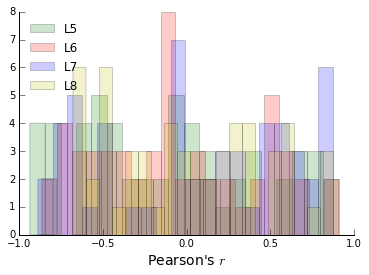

In [76]:
plt.figure()
ax = plt.subplot(111)
ax.hist(art_syn1_corr, 20, color='g', alpha=0.2)
ax.hist(art_syn2_corr, 20, color='r', alpha=0.2)
ax.hist(art_syn3_corr, 20, color='b', alpha=0.2)
ax.hist(art_syn4_corr, 20, color='y', alpha=0.2)
plt.legend(['L5', 'L6', 'L7', 'L8'], loc='upper left', frameon=False)
plt.xlabel('Pearson\'s $r$', fontsize=14)
V4.simpleaxis(ax)
#ax.plot(np.arange(60), np.zeros(60), 'k--')
#plt.xlim([-1, 60])
#plt.xlabel('neuron', fontsize=14)
plt.savefig('../04-figures_cosyne2017/tune_and_pseudor2/hue_tune_corr_histogram.pdf', format='pdf')
plt.show()

### Histogram model vs VGG16 model

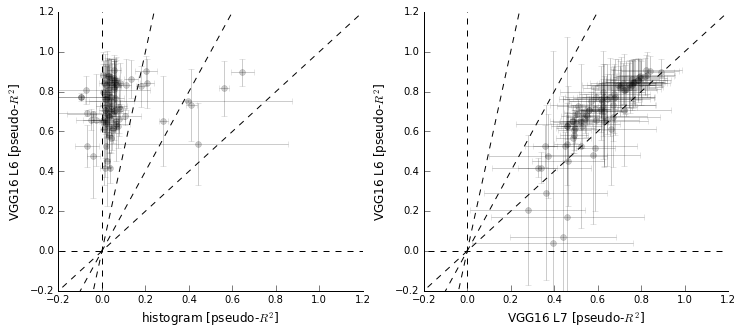

In [40]:
plt.figure(figsize=(12,5))

# L6
ax = plt.subplot(121)
V4.simpleaxis(ax)

syn_model1_name = 'vggl6_model'
for neuron_id, neuron_name in enumerate(df_results_all['name']):
    mu_x = np.mean(df_fits_all['histogram_model'][neuron_id]['pseudo_R2'])
    sigma_x = np.std(df_fits_all['histogram_model'][neuron_id]['pseudo_R2'])
    
    mu_y = np.mean(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2'])
    sigma_y = np.std(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2'])
    
    if (mu_y - 2. * sigma_y > 0.):
        ax.errorbar(x=mu_x, y=mu_y, 
                    xerr=sigma_x, yerr=sigma_y,
                    fmt='ko', alpha=0.2)

ax.plot(np.linspace(-2., 2., 10), np.linspace(-2., 2., 10), 'k--')
ax.plot(np.linspace(-2., 2., 10), 2. * np.linspace(-2., 2., 10), 'k--')
ax.plot(np.linspace(-2., 2., 10), 5. * np.linspace(-2., 2., 10), 'k--')
ax.plot(np.linspace(-2., 2., 10), np.zeros(10), 'k--')
ax.plot(np.zeros(10), np.linspace(-2., 2., 10), 'k--')
ax.axis([-0.2, 1.2, -0.2, 1.2])
plt.xlabel('histogram [pseudo-$R^2$]', fontsize=12)
plt.ylabel('VGG16 L6 [pseudo-$R^2$]', fontsize=12)

# L6 vs. L7
ax = plt.subplot(122)
V4.simpleaxis(ax)

syn_model1_name = 'vggl6_model'
syn_model2_name = 'vggl7_model'

for neuron_id, neuron_name in enumerate(df_results_all['name']):
    mu_hist = np.mean(df_fits_all['histogram_model'][neuron_id]['pseudo_R2'])
    sigma_hist = np.std(df_fits_all['histogram_model'][neuron_id]['pseudo_R2'])

    mu_x = np.mean(df_results_all[syn_model2_name][neuron_id]['image_model']['pseudo_R2'])
    sigma_x = np.std(df_results_all[syn_model2_name][neuron_id]['image_model']['pseudo_R2'])

    mu_y = np.mean(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2'])
    sigma_y = np.std(df_results_all[syn_model1_name][neuron_id]['image_model']['pseudo_R2'])
    
    if (mu_cnn - 2. * sigma_cnn > 0.):
        ax.errorbar(x=mu_x, y=mu_y, 
                    xerr=sigma_x, yerr=sigma_y,
                    fmt='ko', alpha=0.2)

ax.plot(np.linspace(-2., 2., 10), np.linspace(-2., 2., 10), 'k--')
ax.plot(np.linspace(-2., 2., 10), 2. * np.linspace(-2., 2., 10), 'k--')
ax.plot(np.linspace(-2., 2., 10), 5. * np.linspace(-2., 2., 10), 'k--')
ax.plot(np.linspace(-2., 2., 10), np.zeros(10), 'k--')
ax.plot(np.zeros(10), np.linspace(-2., 2., 10), 'k--')
ax.axis([-0.2, 1.2, -0.2, 1.2])
plt.xlabel('VGG16 L7 [pseudo-$R^2$]', fontsize=12)
plt.ylabel('VGG16 L6 [pseudo-$R^2$]', fontsize=12)

plt.savefig('../04-figures_cosyne2017/histogram_vs_L6_pseudoR2s_scatter.pdf', format='pdf')
plt.show()

In [22]:
df_fits_all['histogram_model'][0]['pseudo_R2']

[0.014697738221247314,
 0.019134041306596683,
 -0.0053595929326955005,
 -0.0050405648544684656,
 0.0121460821652567,
 -0.021538501492712525,
 0.03974324403061813,
 0.036938917737746824,
 0.060158561171350211,
 -0.019860025321204455]

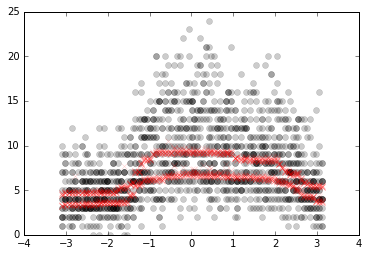

In [30]:
plt.plot(df_fits_all.loc[1]['art_model']['hue'], df_fits_all.loc[1]['art_model']['spike_counts'], 'ko', alpha=0.2)
plt.plot(df_fits_all.loc[1]['art_model']['hue'], df_fits_all.loc[1]['art_model']['predicted_spike_counts'], 'rx', alpha=0.2)
plt.show()

In [44]:
df_fits_all.loc[10]['art_model']['pseudo_R2']

[-0.10866717610575249, 0.32865544643336242, -0.40103016106310285]

### Visualize low dimensional projection

In [31]:
syn_model1_name = 'vggl5_model'
syn_model1_prediction = 'vggl5_hue_prediction'
syn_model2_name = 'vggl6_model'
syn_model2_prediction = 'vggl6_hue_prediction'
syn_model3_name = 'vggl7_model'
syn_model3_prediction = 'vggl7_hue_prediction'
syn_model4_name = 'vggl8_model'
syn_model4_prediction = 'vggl8_hue_prediction'

art_model_name = 'art_model'

In [108]:
X = list()
Y = list()
for neuron_id, neuron_name in enumerate(df_results_all['name']):
    this_model = df_results_all[syn_model4_prediction][neuron_id]
    X.append(this_model['image_predicted_spike_counts'])
    
    art_spikes = df_fits_all[art_model_name][neuron_id]['predicted_spike_counts']
    h = df_fits_all[art_model_name][neuron_id]['hue'] * 180. / np.pi
    h[h < 0.] = 360. + h[h < 0.]
    
#     h = np.floor(h)
#     this_y = np.zeros(360)
#     this_y_count = np.zeros(360)
#     this_y_final = np.zeros(360)
#     for sp, spk in enumerate(art_spikes):
#         this_y[h[sp]] += spk
#         this_y_count[h[sp]] += 1
#     for hue_id in range(360):
#         if this_y_count[hue_id] == 0:
#             this_y_final[hue_id] = 0
#         else:
#             this_y_final[hue_id] = this_y[hue_id] / this_y_count[hue_id]
    f_poly = np.poly1d(np.polyfit(h, art_spikes, 15))        
    this_y_final = f_poly(np.arange(360))
    Y.append(this_y_final)

In [109]:
X = np.array(X).T
Y = np.array(Y).T
print X.shape, Y.shape

(360, 90) (360, 90)


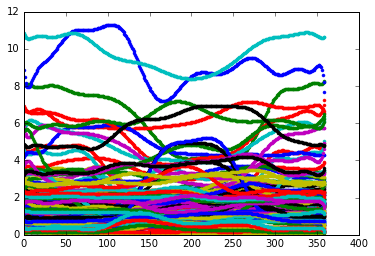

In [92]:
plt.plot(Y, '.')
plt.show()

In [93]:
hue = np.linspace(0, 359, 360)
rgb_list = list()
stimpath = '../V4pydata'
for a, ang in enumerate(hue):
    imname = '/stimuli/M3/Hues/img%03d.jpg' % np.floor(ang)
    filename = stimpath + imname
    I = cv2.imread(filename)
    rgb_list.append(I[0,0,:][::-1])

In [94]:
from sklearn.manifold import TSNE, MDS, SpectralEmbedding

In [110]:
se = SpectralEmbedding(n_components=2)
X_lowd = se.fit_transform(X)

se = SpectralEmbedding(n_components=2)
Y_lowd = se.fit_transform(Y)

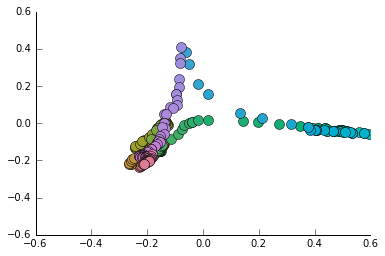

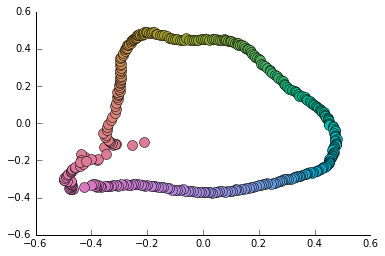

In [111]:
#plt.figure(figsize=(15,5))
plt.figure()
ax = plt.subplot(111)
for im in range(X_lowd.shape[0]):
    ax.plot(X_lowd[im, 0], X_lowd[im, 1], 'o', ms=10, c=rgb_list[im].astype(float) / 255.0)
V4.simpleaxis(ax)
plt.axis([-0.6, 0.6, -0.6, 0.6])
plt.savefig('nat_L8_hue_embedding.pdf', format='pdf')
plt.show()

plt.figure()
ax = plt.subplot(111)
for im in range(Y_lowd.shape[0]):
    ax.plot(-Y_lowd[im, 0], Y_lowd[im, 1], 'o', ms=10, c=rgb_list[im].astype(float) / 255.0)
V4.simpleaxis(ax)
plt.axis([-0.6, 0.6, -0.6, 0.6])
#plt.savefig('art_hue_embedding.pdf', format='pdf')
plt.show()
